# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

In this project, we will try to be a **journey planner, trip planner** which would recommend the tourist to find an optimal location for his trips i.e. hotels, restaurants. Specifically, this report will be targeted to the visitor who are interested to travel to **San Francisco** in **the United States**.

Since there are many places in San Francisco, we will try to detect **locations that are liked and visited the most by folks**. We are also particularly interested in **areas having all close to those locations**. We would also prefer locations **as close to city center as possible**, assuming that first two conditions are met.

We would like to help visitors with the help of data science, which are the best venues to be visited based on some criteria.


## Data <a name="data"></a>

Following data sources will be needed to extract/generate the required information:

* Number of venues and their type and location in San Francisco will be obtained using **Foursquare API**
* Statistical information like number of check-in, venues coordinates, pricing of a venue, ratings and URL of the venues will also be obtained using **Foursquare API**

### Importing Required Libraries

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


import folium # map rendering library

print('Libraries imported.')

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pingouin as pg
from sklearn import preprocessing

Libraries imported.


### San Francisco Location

Let's get latitude & longitude coordinates of San Francisco.



for centroids of our candidate neighborhoods. We will create a grid of cells covering our area of interest which is aprox. 12x12 killometers centered around Berlin city center.

Let's first find the latitude & longitude of Berlin city center, using specific, well known address and Google Maps geocoding API.

In [4]:
address = 'san francisco'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of san francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of san francisco are 37.7792808, -122.4192363.


Looking San Francisco in MAP

In [5]:

map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
folium.CircleMarker(
    [latitude, longitude],
    radius=5,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_newyork)  
    
map_newyork
# Save to html
map_newyork.save('#Looking_San_Francisco_in_MAP.html')


### Foursquare
Now that we have our location, let's use Foursquare API to get Venues in San Francisco. We are interested in all venues like hotels, restaurants, coffee shops, pizza places, museum etc. As we know later, we need to get venue details. Therefore, first we would fetch venue IDs of all venues.

In [8]:
# Foursquare API credentials 

In [ ]:
venues_list=[]
lat = latitude
lng = longitude
#print(name)
# create the API request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lng, 
    radius, 
    LIMIT)
            
        # make the GET request
results = requests.get(url).json()["response"]['groups'][0]['items']
       # print(results)
        # return only relevant information for each nearby venue
venues_list.append([(
    lat, 
    lng, 
    v['venue']['name'],
    v['venue']['id'],
    v['venue']['location']['lat'], 
    v['venue']['location']['lng'],  
    v['venue']['categories'][0]['name']) for v in results])

nearby_venues_t = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venues_t.columns = ['Latitude', 
                           'Longitude', 
                           'Venue', 
                           'Venue ID',                              
                           'Venue Latitude', 
                           'Venue Longitude', 
                           'Venue Category']

In [ ]:
nearby_venues_t.head()

Getting Foursquare API San Francisco Vanue detail data (nearby Vanue and their ID)

In [ ]:
venues_list_likes_n=[]
for id_data in nearby_venues_t['Venue ID']:
    url_3 = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
    id_data,
    CLIENT_ID_3, 
    CLIENT_SECRET_3, 
    VERSION_3)
    url_3
    data = requests.get(url_3).json()
    #data = json.loads(my_json_string)
    if 'price' not in data["response"]['venue']:
        v_price = ''
    elif 'currency' in data["response"]['venue']['price']:
        v_price = data["response"]['venue']['price']['tier'] 
    if 'rating' not in data["response"]['venue']:
        v_rating = ''
    elif 'rating' in data["response"]['venue']:
        v_rating = data["response"]['venue']['rating']     
    if 'likes' not in data["response"]['venue']:
        v_likes = ''
    elif 'summary' in data["response"]['venue']['likes']:
        v_likes = data["response"]['venue']['likes']['summary']      
    if 'stats' not in data["response"]['venue']:
        v_stats = ''
    elif 'stats' in data["response"]['venue']:
        v_stats = data["response"]['venue']['stats']
        v_checkinsCount = v_stats.get('checkinsCount')
        v_usersCount = v_stats.get('usersCount')
        v_tipCount = v_stats.get('tipCount')
    if 'url' not in data["response"]['venue']:
        v_url = ''
    elif 'url' in data["response"]['venue']:
        v_url = data["response"]['venue']['url']
    if 'name' not in data["response"]['venue']:
        v_name = ''       
    elif 'name' in data["response"]['venue']:
        v_name = data["response"]['venue']['name']
        print(v_name)
    if 'categories' not in data["response"]['venue']:
        v_categories = ''      
    elif 'categories' in data["response"]['venue']:
        v_categories = data["response"]['venue']['categories'][0]['name']
        print(v_categories)        
    if 'canonicalUrl' not in data["response"]['venue']:
        v_url_foursquare = ''      
    elif 'canonicalUrl' in data["response"]['venue']:
        v_url_foursquare = data["response"]['venue']['canonicalUrl']
        print(v_categories)  
    if 'location' not in data["response"]['venue']:
        v_lat = ''
        v_long = ''
    elif 'location' in data["response"]['venue']:
        v_lat = data["response"]['venue']['location']['lat']
        v_long = data["response"]['venue']['location']['lng']        
        print(v_categories)
        
    venues_list_likes_n.append([(
        id_data,
        v_name,
        v_categories,
        v_lat,
        v_long,
        v_checkinsCount,
        v_likes,
        v_price,
        v_rating,
        v_url,
        v_url_foursquare)])

Saving DATA and setting name of columns

In [ ]:
nearby_venues_t_likes_n = pd.DataFrame([item for venue_list in venues_list_likes_n for item in venue_list])
nearby_venues_t_likes_n.columns = ['id', 'name', 'categories', 'lat', 'long', 'num_checkins', 'num_likes', 'price', 'rating', 'url_venue', 'url_foursquare' ]

Removing 'Like' word from datframe's column "num_likes"

In [ ]:
nearby_venues_t_likes_n = nearby_venues_t_likes_n.replace('Likes','', regex=True)

Observing the DATA

In [7]:
nearby_venues_t_likes_n = nearby_venues_t_likes_n.drop(["num_ratings"], axis=1)
nearby_venues_t_likes_n.head()

,id,name,categories,lat,long,num_checkins,num_likes,price,rating,url_venue,url_foursquare
0,4ec6e39799115348d857eef7,Pioneer Monument (James Lick Monument),Art Gallery,37.779800,-122.416135,43,0.0,NaN,NaN,http://www.sfartscommission.org,http://4sq.com/sCDvwW
1,4ee2341cf9ab478e5935d27d,Calibre One,Office,37.783210,-122.393368,10,0.0,NaN,NaN,NaN,http://4sq.com/t4zgoG
2,4e9126889a52db7dba8dc0a0,The Red Room,Nightlife Spot,37.734963,-122.479835,7,0.0,NaN,NaN,NaN,http://4sq.com/qO5NSG
3,53503f72498ef2dd1139298b,"Strip, Cuddle Up And Nap",Residential Building (Apartment / Condo),37.712424,-122.430949,2,0.0,NaN,NaN,NaN,http://4sq.com/1lcZpnN
4,4a1f1787f964a520057c1fe3,Madusalon,Salon / Barbershop,37.772272,-122.437238,529,17.0,NaN,7.4,http://www.madusalon.com,http://4sq.com/5mEGxl


So, now we have all the vanues in area, and have all of their visited feedback information.

This concludes the data gathering phase has been completd.

## Methodology <a name="methodology"></a>

Now, we have all required data, our objective is to recommend venues for stay, for visit and for eating based on different attributes like rating, number of check-in and price. We will limit our analysis to area around already recommended hotels.

In the first step we have to analyses the **Foursquare API** data, get fix null values.  

In the second step, we have to segregate the required information like **venue data: location of hotels, tourist points, restaurants, small coffee shops, bars with their characteristics** (rating, number of check-in and price).

The third step would **be exploration analysis to find a correlation between different attributes**.  

In the fourth step, we will focus on most similar venues based on available characteristics **by clustering them** (using **k-means clustering**) of each segregated data.

In the fifth and final step, we will take clustered data of hotels and find other venues near those hotels for tourists. This would be done **by calculating the distance of each category hotel cluster to the same category cluster visiting venues**.


## **Analysis** <a name="analysis"></a>

### Visually inspect
Checking columns

In [8]:
nearby_venues_t_likes_n.columns 

Index(['id', 'name', 'categories', 'lat', 'long', 'num_checkins', 'num_likes',
       'price', 'rating', 'url_venue', 'url_foursquare'],
      dtype='object')

Chceking number of rows and columns

In [9]:
nearby_venues_t_likes_n.shape 

(44425, 11)

Getting a concise summary of the dataframe

In [10]:
nearby_venues_t_likes_n.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44425 entries, 0 to 44424
Data columns (total 11 columns):
id                44425 non-null object
name              44424 non-null object
categories        41957 non-null object
lat               44425 non-null float64
long              44425 non-null float64
num_checkins      44425 non-null int64
num_likes         44421 non-null float64
price             8365 non-null float64
rating            8167 non-null float64
url_venue         8793 non-null object
url_foursquare    44425 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 3.7+ MB


We can see that most of columns have null values so, an observation(row) having no category would have no use. So, have to remove those observations which we having null value in column.

In [11]:
nearby_venues_t_likes_n = nearby_venues_t_likes_n.dropna(subset=['categories'])
nearby_venues_t_likes_n.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41957 entries, 0 to 44424
Data columns (total 11 columns):
id                41957 non-null object
name              41957 non-null object
categories        41957 non-null object
lat               41957 non-null float64
long              41957 non-null float64
num_checkins      41957 non-null int64
num_likes         41953 non-null float64
price             8365 non-null float64
rating            8167 non-null float64
url_venue         8748 non-null object
url_foursquare    41957 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 3.8+ MB


Segregating **Foursquare API** data by extracting the location of staying places for visitors. Could be done **by searching similar words of Hotel i.e. Inn, Motel, B & B** 

In [12]:
search_values = ['Hotel', 'Resort', 'Inn', 'Motel', 'Boarding house', 'Guest house', 'Lodge', 'bed and breakfast', 'B & B', 'Hostel', 'Aparthotel', 'Boatel', 'Pension', 'Auberge', 'Parador', 'Posada', 'Pousada', 'Pensione', 'Gasthaus']
Hotels_like_sf = nearby_venues_t_likes_n[nearby_venues_t_likes_n['categories'].str.contains('|'.join(search_values ))]
Hotels_like_sf.head()

,id,name,categories,lat,long,num_checkins,num_likes,price,rating,url_venue,url_foursquare
74,3fd66200f964a52031f11ee3,Tonga Room & Hurricane Bar,"Tiki Bar, Asian Restaurant, Hotel Bar",37.792261,-122.409636,17052,621.0,3.0,8.0,http://bit.ly/wWpDIs,http://4sq.com/4s2Vma
173,4bc3db14dce4eee1ccc7719d,BridgePoint Inn,"Motel, Hotel",37.705262,-122.408040,134,0.0,NaN,NaN,NaN,http://4sq.com/dwiCPC
348,599fa50986f4cc3bed460370,Music City Hotel/Hostel,"Hostel, Hotel",37.788695,-122.419595,10,1.0,NaN,NaN,NaN,http://4sq.com/2xxMxEJ
456,4e2104b21f6effe84f6d6d1c,Unforgiving Abyss,Resort,37.805399,-122.438795,163,0.0,NaN,NaN,NaN,http://4sq.com/pimb3g
605,5893e65f0b5656504317626b,The Murphy Suite,Hotel,37.763615,-122.427010,17,0.0,NaN,NaN,NaN,http://4sq.com/2jDjcWT


Let's perform some basic explanatory data analysis and derive some additional info from our raw data (Hotels_like_sf). First, let's null values in this category

In [13]:
Hotels_like_sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 74 to 44320
Data columns (total 11 columns):
id                528 non-null object
name              528 non-null object
categories        528 non-null object
lat               528 non-null float64
long              528 non-null float64
num_checkins      528 non-null int64
num_likes         528 non-null float64
price             59 non-null float64
rating            252 non-null float64
url_venue         178 non-null object
url_foursquare    528 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 49.5+ KB


We can see that there are only 59 observations with price information. Lets check other characteristics like "num_checkins"

In [14]:
Hotels_like_sf['num_checkins'].describe()

count      528.000000
mean      2065.954545
std       6319.358223
min          1.000000
25%         18.000000
50%        180.000000
75%       1030.750000
max      56609.000000
Name: num_checkins, dtype: float64

Checking data **data distribution** of **num_checkins**

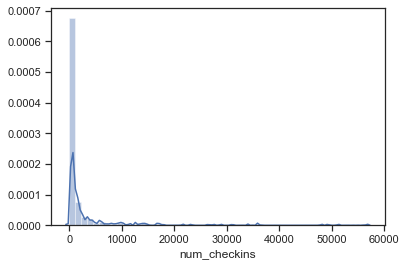

In [15]:
x = Hotels_like_sf['num_checkins']
sns.distplot(x);

As it could be seen that **data distribution** of **num_checkins**  is skewed to right. Lets check density of it.

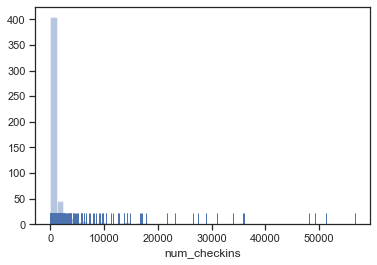

In [16]:
sns.distplot(x, kde=False, rug=True);

As it could be seenn that most of observations **are below 10000**

As, number of check-in tell us number of people visited the place.So, we wanted to define **thrushold of minimum 1000 people who visited that place with rating more above 7**


First, filtering visters

In [17]:
# making a bool series 
bool_series = Hotels_like_sf["num_checkins"].between(1000, 56609, inclusive = True) 
Hotels_like_sf_rated = Hotels_like_sf[bool_series]
Hotels_like_sf_rated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 74 to 44320
Data columns (total 11 columns):
id                135 non-null object
name              135 non-null object
categories        135 non-null object
lat               135 non-null float64
long              135 non-null float64
num_checkins      135 non-null int64
num_likes         135 non-null float64
price             17 non-null float64
rating            133 non-null float64
url_venue         118 non-null object
url_foursquare    135 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 12.7+ KB


Now, filtering desired ratings

In [18]:
# making a bool series 
bool_series = Hotels_like_sf_rated["rating"].between(7.0, 10.0, inclusive = True) 
Hotels_like_sf_rated = Hotels_like_sf_rated[bool_series]
Hotels_like_sf_rated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 74 to 44320
Data columns (total 11 columns):
id                67 non-null object
name              67 non-null object
categories        67 non-null object
lat               67 non-null float64
long              67 non-null float64
num_checkins      67 non-null int64
num_likes         67 non-null float64
price             11 non-null float64
rating            67 non-null float64
url_venue         63 non-null object
url_foursquare    67 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 6.3+ KB


In [19]:
Hotels_like_sf_rated.head()

,id,name,categories,lat,long,num_checkins,num_likes,price,rating,url_venue,url_foursquare
74,3fd66200f964a52031f11ee3,Tonga Room & Hurricane Bar,"Tiki Bar, Asian Restaurant, Hotel Bar",37.792261,-122.409636,17052,621.0,3.0,8.0,http://bit.ly/wWpDIs,http://4sq.com/4s2Vma
1342,45487ec6f964a520863c1fe3,Kimpton Sir Francis Drake Hotel,"Hotel, Meeting Room, Restaurant",37.788972,-122.408358,16728,204.0,NaN,7.5,http://www.sirfrancisdrake.com,http://4sq.com/5LckJP
2213,49ce75e7f964a520415a1fe3,Four Seasons Hotel San Francisco,Hotel,37.786433,-122.404276,14311,176.0,NaN,8.6,NaN,http://4sq.com/4GlKqM
2612,42911d00f964a52000241fe3,Redwood Room,Hotel Bar,37.786767,-122.411291,14892,239.0,3.0,8.3,http://backofhouse.morganshotelgroup.com,http://4sq.com/6faGTT
2712,4bcf7dce0ffdce723e8bb2c0,Beck's Motor Lodge,Motel,37.765595,-122.431808,1485,25.0,NaN,7.0,http://www.becksmotorlodge.com/rates.php,http://4sq.com/djy29N


Sorting data by latitude & longitude in search of duplicate data. Because it could be seen that hotel's bars and restaurant also included in it.

In [20]:
Hotels_like_sf_rated_s = Hotels_like_sf_rated.sort_values(by=['lat', 'long'], ascending=False)
Hotels_like_sf_rated_s.head(n=10)

,id,name,categories,lat,long,num_checkins,num_likes,price,rating,url_venue,url_foursquare
5994,557a3ea1498e2bd7d8892a43,Hotel Zephyr,Hotel,37.807763,-122.413222,1928,124.0,NaN,8.3,http://www.hotelzephyrsf.com,http://4sq.com/1L4dF20
35642,4a9f24eff964a520ad3c20e3,Argonaut Hotel,"Hotel, Event Space, Meeting Room",37.807570,-122.420150,6539,143.0,NaN,8.1,http://www.argonauthotel.com,http://4sq.com/8rAyGw
31723,4b717e66f964a52085492de3,Courtyard San Francisco Fisherman's Wharf,Hotel,37.807165,-122.418318,2743,37.0,NaN,7.1,http://www.marriott.com/hotels/travel/sfocf-co...,http://4sq.com/cJM92K
25940,4c4a64febad7a59314784daa,Hosteling International,Hostel,37.807122,-122.428675,1556,46.0,NaN,8.1,NaN,http://4sq.com/cPE5Yx
39395,4aaef81ef964a520d76320e3,Fairmont Heritage Place,"Hotel, Resort, Residential Building (Apartment...",37.805510,-122.423308,1554,16.0,NaN,7.7,http://bit.ly/wWpDIs,http://4sq.com/cLFqiJ
7833,527b3124498e02ffcb544122,Pier 2620 Hotel,Hotel,37.805436,-122.416894,1874,110.0,NaN,8.2,http://www.pier2620hotel.com,http://4sq.com/1enjEz4
25537,4ac6a15af964a52083b520e3,Green Tortoise Hostel,Hostel,37.798072,-122.405340,1702,59.0,NaN,8.8,http://www.greentortoise.com/san-francisco-hostel,http://4sq.com/deoAeJ
10123,4acbca4bf964a520b1c720e3,Le Méridien,Hotel,37.794678,-122.400892,14216,197.0,NaN,7.6,http://www.lemeridiensanfrancisco.com,http://4sq.com/90MvWw
29130,4bc9ec12511f95219887aec7,The Eclipse Kitchen and Bar,"Hotel Bar, Breakfast Spot, Cocktail Bar",37.794449,-122.395925,1437,32.0,2.0,7.5,http://www.sanfrancisco.regency.hyatt.com/hyat...,http://4sq.com/aVTci1
42273,4a050141f964a52047721fe3,Hyatt Regency San Francisco,"Hotel, Parking",37.794351,-122.395935,28872,338.0,NaN,8.0,http://sanfrancisco.regency.hyatt.com,http://4sq.com/xi2Zh


In [21]:
# dropping ALL duplicte values 
Hotels_like_sf_rated_s.drop_duplicates(subset =['lat','long'] , keep = False, inplace = True)


In [22]:
Hotels_like_sf_rated_n = Hotels_like_sf_rated_s.reset_index(drop=True)

Marking places in map

In [23]:

map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name, categories in zip(Hotels_like_sf_rated_s['lat'], Hotels_like_sf_rated_s['long'], Hotels_like_sf_rated_s['name'], Hotels_like_sf_rated_s['categories']):
    label = '{}, {}'.format(name, categories)
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(
        [lat, lng],
        radius=.1,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork
# Save to html
map_newyork.save('#Hotels_like_sf_rated_s.html')

Now try to find relationship between different columns


As we know other columns like 'name', 'id', 'categories', 'lat', 'long', 'url_venue', 'url_foursquare' are just identifiers in some way could not have any relationship so remove them. Furthermore, very few rating available so it could not help us.

In [24]:
df=Hotels_like_sf_rated_s.drop(['name', 'id', 'categories', 'lat', 'long', 'price', 'url_venue', 'url_foursquare'], axis=1)

df.head()

,num_checkins,num_likes,rating
5994,1928,124.0,8.3
35642,6539,143.0,8.1
31723,2743,37.0,7.1
25940,1556,46.0,8.1
39395,1554,16.0,7.7


Making correlation matrix

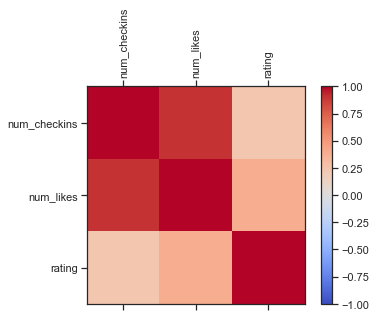

In [25]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

Checking Correlation coefficient

In [26]:
df.rcorr()

,num_checkins,num_likes,rating
num_checkins,-,***,
num_likes,0.902,-,***
rating,0.231,0.394,-


* n is the sample size, i.e. how many observations were included in the calculation of the correlation coefficient
* r is the correlation coefficient, 0.902 in case of num_likes vs num_checkins, which is quite high.
* CI95% are the 95% confidence intervals around the correlation coefficient
* r2 and adj_r2 are the r-squared and ajusted r-squared respectively. As its name implies, it is simply the squared r, which is a measure of the proportion of the variance in the first variable that is predictable from the second variable.
* p-val is the p-value of the test. The general rule is that you can reject the hypothesis that the two variables are not correlated if the p-value is below 0.05, which is the case (num_likes vs num_checkins). We can therefore say that there is a significant correlation between the two variables.
* BF10 is the Bayes Factor of the test, which also measure the statistical significance of the test. It directly measures the strength of evidence in favor of our initial hypothesis that num_likes vs num_checkins are correlated. Since this value is very large, it indicates that there is very strong evidence that the two variables are indeed correlated. While they are conceptually different, the Bayes Factor and p-values will in practice often reach the same conclusion.
* power is the achieved power of the test, which is the likelihood that we will detect an effect when there is indeed an effect there to be detected. The higher this value is, the more robust our test is. In that case, a value of 1 means that we can be greatly confident in our ability to detect the significant effect.

In [27]:
pg.corr(x=df['num_likes'], y=df['num_checkins'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,67,0.902,"[0.84, 0.94]",0.813,0.807,2.256251e-25,1.454e+22,1.0


In [28]:
pg.corr(x=df['num_likes'], y=df['rating'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,67,0.394,"[0.17, 0.58]",0.155,0.129,0.000967,31.409,0.919


In [29]:
pg.corr(x=df['num_checkins'], y=df['rating'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,67,0.231,"[-0.01, 0.45]",0.053,0.024,0.059916,0.862,0.474


So, we concluded in the aforementioned exercise that the number of likes is highly correlated with the number of check-ins which is logical because as the number of check-in increase number of likes also increase accordingly.

Adding new column TYPE for better understanding

In [30]:
Hotels_like_sf_rated_n['Type'] = 'Hotel'
Hotels_like_sf_rated_n.head()

,id,name,categories,lat,long,num_checkins,num_likes,price,rating,url_venue,url_foursquare,Type
0,557a3ea1498e2bd7d8892a43,Hotel Zephyr,Hotel,37.807763,-122.413222,1928,124.0,NaN,8.3,http://www.hotelzephyrsf.com,http://4sq.com/1L4dF20,Hotel
1,4a9f24eff964a520ad3c20e3,Argonaut Hotel,"Hotel, Event Space, Meeting Room",37.807570,-122.420150,6539,143.0,NaN,8.1,http://www.argonauthotel.com,http://4sq.com/8rAyGw,Hotel
2,4b717e66f964a52085492de3,Courtyard San Francisco Fisherman's Wharf,Hotel,37.807165,-122.418318,2743,37.0,NaN,7.1,http://www.marriott.com/hotels/travel/sfocf-co...,http://4sq.com/cJM92K,Hotel
3,4c4a64febad7a59314784daa,Hosteling International,Hostel,37.807122,-122.428675,1556,46.0,NaN,8.1,NaN,http://4sq.com/cPE5Yx,Hotel
4,4aaef81ef964a520d76320e3,Fairmont Heritage Place,"Hotel, Resort, Residential Building (Apartment...",37.805510,-122.423308,1554,16.0,NaN,7.7,http://bit.ly/wWpDIs,http://4sq.com/cLFqiJ,Hotel


Getting data ready for **K-Mean Clustering**


As we know other columns like 'name', 'id', 'categories', 'lat', 'long', 'url_venue', 'url_foursquare' are just identifiers in some way could not have any relationship so remove them. Furthermore, very few rating available so it could not help us.

In [31]:
cluster_Hotels_del=Hotels_like_sf_rated_s.drop(['name', 'id', 'categories', 'lat', 'long', 'price', 'url_venue', 'url_foursquare'], axis=1)

cluster_Hotels_del.head()

,num_checkins,num_likes,rating
5994,1928,124.0,8.3
35642,6539,143.0,8.1
31723,2743,37.0,7.1
25940,1556,46.0,8.1
39395,1554,16.0,7.7



Preprocesing - transforms features by scaling each feature to a range.
Scaling and translating each feature individually such that it is in the given range on the cluster_Hotels_del set

In [32]:
x = cluster_Hotels_del.values #returns a numpy array
#normData = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
cluster_Hotels_del = pd.DataFrame(x_scaled)
#(scaler.transform(df), index=df.index, columns=df.columns)
cluster_Hotels_del.head()

,0,1,2
0,0.015732,0.152975,0.541667
1,0.098731,0.179887,0.458333
2,0.030402,0.029745,0.041667
3,0.009036,0.042493,0.458333
4,0.009000,0.000000,0.291667


In [33]:
cluster_Hotels_del.columns = ['num_checkins', 'num_likes', 'rating']
cluster_Hotels_del.head()

,num_checkins,num_likes,rating
0,0.015732,0.152975,0.541667
1,0.098731,0.179887,0.458333
2,0.030402,0.029745,0.041667
3,0.009036,0.042493,0.458333
4,0.009000,0.000000,0.291667


Our Hotels data is ready for clustering.
**Let's cluster hotels basis on there charactristics (num_checkins, num_likes, rating)** with 7 number of clusters 

In [34]:
# set number of clusters
kclusters = 7


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_Hotels_del)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 0, 4, 0, 4, 2, 5, 0, 1])

Add clustering labels accordingly

In [35]:
# add labels
cluster_Hotels_del.insert(0, 'Cluster Labels', kmeans.labels_)
cluster_Hotels_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
Cluster Labels    67 non-null int32
num_checkins      67 non-null float64
num_likes         67 non-null float64
rating            67 non-null float64
dtypes: float64(3), int32(1)
memory usage: 1.9 KB


Checking number of row of **Hotels_like_sf_rated_s**

In [36]:
Hotels_like_sf_rated_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 5994 to 2712
Data columns (total 11 columns):
id                67 non-null object
name              67 non-null object
categories        67 non-null object
lat               67 non-null float64
long              67 non-null float64
num_checkins      67 non-null int64
num_likes         67 non-null float64
price             11 non-null float64
rating            67 non-null float64
url_venue         63 non-null object
url_foursquare    67 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 6.3+ KB


Merging dataframe cluster_Hotels_del with Hotels_like_sf_rated_s

In [37]:
cluster_Hotels_all = pd.merge(cluster_Hotels_del, Hotels_like_sf_rated_n, left_index=True, right_index=True)
cluster_Hotels_all.head()

,Cluster Labels,num_checkins_x,num_likes_x,rating_x,id,name,categories,lat,long,num_checkins_y,num_likes_y,price,rating_y,url_venue,url_foursquare,Type
0,4,0.015732,0.152975,0.541667,557a3ea1498e2bd7d8892a43,Hotel Zephyr,Hotel,37.807763,-122.413222,1928,124.0,NaN,8.3,http://www.hotelzephyrsf.com,http://4sq.com/1L4dF20,Hotel
1,4,0.098731,0.179887,0.458333,4a9f24eff964a520ad3c20e3,Argonaut Hotel,"Hotel, Event Space, Meeting Room",37.807570,-122.420150,6539,143.0,NaN,8.1,http://www.argonauthotel.com,http://4sq.com/8rAyGw,Hotel
2,0,0.030402,0.029745,0.041667,4b717e66f964a52085492de3,Courtyard San Francisco Fisherman's Wharf,Hotel,37.807165,-122.418318,2743,37.0,NaN,7.1,http://www.marriott.com/hotels/travel/sfocf-co...,http://4sq.com/cJM92K,Hotel
3,4,0.009036,0.042493,0.458333,4c4a64febad7a59314784daa,Hosteling International,Hostel,37.807122,-122.428675,1556,46.0,NaN,8.1,NaN,http://4sq.com/cPE5Yx,Hotel
4,0,0.009000,0.000000,0.291667,4aaef81ef964a520d76320e3,Fairmont Heritage Place,"Hotel, Resort, Residential Building (Apartment...",37.805510,-122.423308,1554,16.0,NaN,7.7,http://bit.ly/wWpDIs,http://4sq.com/cLFqiJ,Hotel


Removing duplicate columns

In [38]:
cluster_Hotels_all = cluster_Hotels_all.drop(['num_checkins_x','num_likes_x','rating_x'], axis=1)
cluster_Hotels_all.head()

,Cluster Labels,id,name,categories,lat,long,num_checkins_y,num_likes_y,price,rating_y,url_venue,url_foursquare,Type
0,4,557a3ea1498e2bd7d8892a43,Hotel Zephyr,Hotel,37.807763,-122.413222,1928,124.0,NaN,8.3,http://www.hotelzephyrsf.com,http://4sq.com/1L4dF20,Hotel
1,4,4a9f24eff964a520ad3c20e3,Argonaut Hotel,"Hotel, Event Space, Meeting Room",37.807570,-122.420150,6539,143.0,NaN,8.1,http://www.argonauthotel.com,http://4sq.com/8rAyGw,Hotel
2,0,4b717e66f964a52085492de3,Courtyard San Francisco Fisherman's Wharf,Hotel,37.807165,-122.418318,2743,37.0,NaN,7.1,http://www.marriott.com/hotels/travel/sfocf-co...,http://4sq.com/cJM92K,Hotel
3,4,4c4a64febad7a59314784daa,Hosteling International,Hostel,37.807122,-122.428675,1556,46.0,NaN,8.1,NaN,http://4sq.com/cPE5Yx,Hotel
4,0,4aaef81ef964a520d76320e3,Fairmont Heritage Place,"Hotel, Resort, Residential Building (Apartment...",37.805510,-122.423308,1554,16.0,NaN,7.7,http://bit.ly/wWpDIs,http://4sq.com/cLFqiJ,Hotel


Checking number of row of cluster_Hotels_all

In [39]:
cluster_Hotels_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 13 columns):
Cluster Labels    67 non-null int32
id                67 non-null object
name              67 non-null object
categories        67 non-null object
lat               67 non-null float64
long              67 non-null float64
num_checkins_y    67 non-null int64
num_likes_y       67 non-null float64
price             11 non-null float64
rating_y          67 non-null float64
url_venue         63 non-null object
url_foursquare    67 non-null object
Type              67 non-null object
dtypes: float64(5), int32(1), int64(1), object(6)
memory usage: 6.6+ KB


Making Clustring Attributes

In [40]:
cluster_Hotels_Report = pd.DataFrame({'Cluster': [], 'Mean_Rating': [], 'Checkins': [], 'Mean_likes': []})
count = 0
while (count < 7):
    bool_series = cluster_Hotels_all['Cluster Labels'] == count
    cluster_Hotels_all_1 = cluster_Hotels_all[bool_series]
    desc = cluster_Hotels_all_1["rating_y"].describe()['mean'] 
    max_c  = cluster_Hotels_all_1["num_checkins_y"].describe()['max'] 
    max_l  = cluster_Hotels_all_1["num_likes_y"].describe()['mean']    
    cluster_Hotels_Report = cluster_Hotels_Report.append({'Cluster': count, 'Mean_Rating': desc, 'Checkins': max_c, 'Mean_likes': max_l}, ignore_index=True)
    count+=1

In [41]:
cluster_Hotels_Report

,Cluster,Mean_Rating,Checkins,Mean_likes
0,0.0,7.368000,9817.0,54.680000
1,1.0,7.650000,35982.0,437.750000
2,2.0,8.700000,14311.0,129.000000
3,3.0,8.687500,35840.0,508.000000
4,4.0,8.116667,8556.0,78.833333
5,5.0,7.862500,16728.0,216.625000
6,6.0,7.950000,56609.0,641.000000


Sorting the clustered dataframe for more investigation

In [42]:
cluster_Hotels_Report_s = cluster_Hotels_Report.sort_values(by=['Mean_Rating', 'Checkins', 'Mean_likes'], ascending=False)
cluster_Hotels_Report_s

,Cluster,Mean_Rating,Checkins,Mean_likes
2,2.0,8.700000,14311.0,129.000000
3,3.0,8.687500,35840.0,508.000000
4,4.0,8.116667,8556.0,78.833333
6,6.0,7.950000,56609.0,641.000000
5,5.0,7.862500,16728.0,216.625000
1,1.0,7.650000,35982.0,437.750000
0,0.0,7.368000,9817.0,54.680000


Grouping the **'Cluster Labels'** to check number of Hetels in each cluster

In [43]:
cluster_Hotels_all.groupby('Cluster Labels').count()

,id,name,categories,lat,long,num_checkins_y,num_likes_y,price,rating_y,url_venue,url_foursquare,Type
Cluster Labels,,,,,,,,,,,,
0,25,25,25,25,25,25,25,6,25,23,25,25
1,4,4,4,4,4,4,4,0,4,4,4,4
2,6,6,6,6,6,6,6,0,6,5,6,6
3,8,8,8,8,8,8,8,3,8,8,8,8
4,12,12,12,12,12,12,12,0,12,11,12,12
5,8,8,8,8,8,8,8,2,8,8,8,8
6,4,4,4,4,4,4,4,0,4,4,4,4


So we **observed that cluster 3 have good Average Rating, more Average likes and 35840 Checkins with 8 number of hotels in the cluster.**

Mapping Clusters Map

In [44]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster_Hotels_all['lat'], cluster_Hotels_all['long'], cluster_Hotels_all['name'], cluster_Hotels_all['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters
# Save to html
map_newyork.save('#cluster_Hotels_all.html')

Getting only **cluster 3** data

In [45]:
bool_series = cluster_Hotels_all['Cluster Labels'] == 3
cluster_Hotels_all_3 = cluster_Hotels_all[bool_series]
cluster_Hotels_all_3

,Cluster Labels,id,name,categories,lat,long,num_checkins_y,num_likes_y,price,rating_y,url_venue,url_foursquare,Type
13,3,4698fe39f964a520f9481fe3,The Fairmont San Francisco,Hotel,37.792298,-122.410543,27467,681.0,NaN,9.2,http://bit.ly/wWpDIs,http://4sq.com/3XJTkA,Hotel
14,3,3fd66200f964a52031f11ee3,Tonga Room & Hurricane Bar,"Tiki Bar, Asian Restaurant, Hotel Bar",37.792261,-122.409636,17052,621.0,3.0,8.0,http://bit.ly/wWpDIs,http://4sq.com/4s2Vma,Hotel
26,3,457c1895f964a520fc3e1fe3,Grand Hyatt San Francisco,Hotel,37.789137,-122.407200,21616,426.0,NaN,8.6,http://sanfrancisco.grand.hyatt.com,http://4sq.com/82B6x5,Hotel
30,3,449a73a9f964a52097341fe3,Palace Hotel,Hotel,37.788599,-122.402019,31015,511.0,NaN,8.7,http://www.sfpalace.com,http://4sq.com/2l4FEn,Hotel
51,3,44abe929f964a52007351fe3,The St. Regis San Francisco,Hotel,37.785960,-122.401454,23183,389.0,NaN,9.4,http://www.stregissanfrancisco.com?SWAQ=94ZA,http://4sq.com/4pDdDy,Hotel
54,3,42c1e480f964a520c4251fe3,The View,"Lounge, Hotel Bar",37.785378,-122.404348,17785,561.0,3.0,8.5,http://www.sfviewlounge.com,http://4sq.com/6Ic895,Hotel
63,3,50e63342b0ed7e4688ddb834,CHAMBERS eat + drink,"Lounge, Hotel Bar, American Restaurant",37.783147,-122.418197,12641,438.0,2.0,8.6,http://www.chambers-sf.com,http://4sq.com/ZhZUFi,Hotel
65,3,4a2c1064f964a52017971fe3,InterContinental San Francisco,"Hotel, Resort, Conference Room",37.782050,-122.404736,35840,437.0,NaN,8.5,http://www.intercontinentalsanfrancisco.com,http://4sq.com/7vtndR,Hotel


**Viewing Cluster 3 Hotels**

In [47]:

map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name, categories in zip(cluster_Hotels_all_3['lat'], cluster_Hotels_all_3['long'], cluster_Hotels_all_3['name'], cluster_Hotels_all_3['categories']):
    label = '{}, {}'.format(name, categories)
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork
# Save to html
map_newyork.save('#cluster_Hotels_all_3.html')

As we can see that they also cloase to each other which good for us.


Segregating **Foursquare API** data by extracting the location of visiting places places for visitors. Could be done **by searching similar words of Monument or Performing i.e.Performing Arts Venue,Theater,History Museum,Event Space** 

In [48]:
search_values = ['Monument', 'Historic Site', 'Performing Arts Venue', 'Construction & Landscaping', 'Performing Arts Venue','Theater','History Museum','Event Space','Concert Hall','Movie Theater','Performing Arts Venue','Theater','Event Space','General Entertainment','Music Venue','College Stadium','College Arts Building', 'Culture', 'Theme Park', 'Museum', 'Landmark', 'Art Gallery', 'Movie Theater','Music Venue','Jazz Club']
visiter_places_sf = nearby_venues_t_likes_n[nearby_venues_t_likes_n['categories'].str.contains('|'.join(search_values ))]
visiter_places_sf.head()


,id,name,categories,lat,long,num_checkins,num_likes,price,rating,url_venue,url_foursquare
0,4ec6e39799115348d857eef7,Pioneer Monument (James Lick Monument),Art Gallery,37.779800,-122.416135,43,0.0,NaN,NaN,http://www.sfartscommission.org,http://4sq.com/sCDvwW
9,4da91bf0f7b145b36feffdc3,Sota Mainstage,Theater,37.745449,-122.448441,37,0.0,NaN,NaN,NaN,http://4sq.com/hkeav6
12,4d40b279c5eaa1cd1efba350,Keith Haring Untitled (3 Figures Dancing),Art Gallery,37.784852,-122.400431,295,5.0,NaN,NaN,NaN,http://4sq.com/g0qS5w
20,4c12c47577cea5931aaecd60,467 Duboce,Art Gallery,37.767785,-122.431069,308,0.0,NaN,NaN,NaN,http://4sq.com/bNrb6F
31,4e5415f918381367473784ff,Bernard Osher Foundation Giraffe Lodge,Event Space,37.732438,-122.504283,110,3.0,NaN,NaN,NaN,http://4sq.com/r11PKn


In [49]:
visiter_places_sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 44422
Data columns (total 11 columns):
id                2436 non-null object
name              2436 non-null object
categories        2436 non-null object
lat               2436 non-null float64
long              2436 non-null float64
num_checkins      2436 non-null int64
num_likes         2436 non-null float64
price             33 non-null float64
rating            433 non-null float64
url_venue         591 non-null object
url_foursquare    2436 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 228.4+ KB


We can see that there are only 33 observations with price information. Lets check other characteristics like "num_checkins"

In [50]:
visiter_places_sf['num_checkins'].describe()

count      2436.000000
mean       1026.130542
std        5692.636755
min           0.000000
25%           6.000000
50%          29.000000
75%         195.000000
max      155280.000000
Name: num_checkins, dtype: float64

As it could be seen that data distribution of num_checkins is skewed to right. Let’s check density of it.

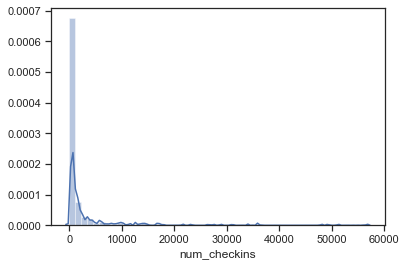

In [51]:
x = Hotels_like_sf['num_checkins']
sns.distplot(x);

In [52]:
visiter_places_sf.describe()

,lat,long,num_checkins,num_likes,price,rating
count,2436.000000,2436.000000,2436.000000,2436.000000,33.000000,433.000000
mean,37.776652,-122.400245,1026.130542,26.375205,2.212121,7.830947
std,0.141033,1.192446,5692.636755,158.173254,0.819969,0.954625
min,37.702073,-122.514020,0.000000,0.000000,1.000000,5.300000
25%,37.762393,-122.433179,6.000000,0.000000,2.000000,7.100000
50%,37.776830,-122.417618,29.000000,0.000000,2.000000,7.800000
75%,37.788207,-122.407140,195.000000,3.000000,3.000000,8.600000
max,44.653253,-63.584801,155280.000000,3370.000000,4.000000,9.600000


As it could be seen that most of observations are below 195

As, number of check-in tell us number of people visited the place. Therefore, we wanted to define threshold of minimum 1000 people who visited that place with rating more above 7

First, filtering visitors


In [53]:
# making a bool series 
bool_series = visiter_places_sf["num_checkins"].between(1000, 155280, inclusive = True) 
visiter_places_sf = visiter_places_sf[bool_series]
visiter_places_sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 119 to 44205
Data columns (total 11 columns):
id                273 non-null object
name              273 non-null object
categories        273 non-null object
lat               273 non-null float64
long              273 non-null float64
num_checkins      273 non-null int64
num_likes         273 non-null float64
price             24 non-null float64
rating            231 non-null float64
url_venue         204 non-null object
url_foursquare    273 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 25.6+ KB


In [54]:
# making a bool series 
bool_series = visiter_places_sf["rating"].between(7.0, 10.0, inclusive = True) 
visiter_places_sf = visiter_places_sf[bool_series]
visiter_places_sf.describe()

,lat,long,num_checkins,num_likes,price,rating
count,208.000000,208.000000,208.000000,208.000000,20.000000,208.000000
mean,37.779015,-122.424195,9507.860577,274.144231,2.150000,8.418750
std,0.016995,0.025315,16669.418918,473.803847,0.875094,0.664551
min,37.702073,-122.512851,1028.000000,8.000000,1.000000,7.000000
25%,37.768902,-122.433145,1826.000000,44.750000,2.000000,7.900000
50%,37.780938,-122.418513,3899.500000,104.500000,2.000000,8.500000
75%,37.789011,-122.407960,9461.250000,267.500000,2.250000,8.925000
max,37.810713,-122.386016,155280.000000,3370.000000,4.000000,9.600000


In [55]:
visiter_places_sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 119 to 44205
Data columns (total 11 columns):
id                208 non-null object
name              208 non-null object
categories        208 non-null object
lat               208 non-null float64
long              208 non-null float64
num_checkins      208 non-null int64
num_likes         208 non-null float64
price             20 non-null float64
rating            208 non-null float64
url_venue         161 non-null object
url_foursquare    208 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 19.5+ KB


We can drop price columns becuase it would be not helpfull becasue it have only 13 values.

In [56]:
visiter_places_sf=visiter_places_sf.drop(['price'], axis=1)
visiter_places_sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 119 to 44205
Data columns (total 10 columns):
id                208 non-null object
name              208 non-null object
categories        208 non-null object
lat               208 non-null float64
long              208 non-null float64
num_checkins      208 non-null int64
num_likes         208 non-null float64
rating            208 non-null float64
url_venue         161 non-null object
url_foursquare    208 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 17.9+ KB


In [57]:
# dropping ALL duplicte values 
visiter_places_sf.drop_duplicates(subset =['lat','long'] , keep = False, inplace = True)
visiter_places_sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 119 to 44205
Data columns (total 10 columns):
id                208 non-null object
name              208 non-null object
categories        208 non-null object
lat               208 non-null float64
long              208 non-null float64
num_checkins      208 non-null int64
num_likes         208 non-null float64
rating            208 non-null float64
url_venue         161 non-null object
url_foursquare    208 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 17.9+ KB


In [58]:
visiter_places_sf = visiter_places_sf.reset_index(drop=True)
visiter_places_sf.head()

,id,name,categories,lat,long,num_checkins,num_likes,rating,url_venue,url_foursquare
0,49f4ee82f964a520796b1fe3,San Francisco Conservatory of Music,"Music School, Concert Hall",37.775489,-122.420381,4003,51.0,8.8,http://sfcm.edu,http://4sq.com/5AAT79
1,3fd66200f964a5201bf11ee3,Cafe Du Nord,"Music Venue, Restaurant",37.766490,-122.430200,7507,179.0,8.8,http://www.cafedunord.com,http://4sq.com/5lUy5N
2,4bbc1556e5b0d13a98f16e7c,Rincon Annex Historic Post Office Lobby,"Art Gallery, Monument / Landmark",37.792774,-122.393446,1090,8.0,7.5,NaN,http://4sq.com/a2VkNT
3,49e282a3f964a5202a621fe3,SHN Golden Gate Theatre,Theater,37.782447,-122.411057,6747,157.0,7.7,http://shnsf.com,http://4sq.com/7qCYqr
4,44ff5a0df964a520a4381fe3,The Knockout,"Bar, Nightclub, Music Venue",37.745227,-122.420117,5635,111.0,7.4,http://theknockoutsf.com,http://4sq.com/7D6BWu


In [60]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name, categories in zip(visiter_places_sf['lat'], visiter_places_sf['long'], visiter_places_sf['name'], visiter_places_sf['categories']):
    label = '{}, {}'.format(name, categories)
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(
        [lat, lng],
        radius=.1,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork
# Save to html
map_newyork.save('#visiter_places_sf.html')

Getting data ready for K-Mean Visitor Place Clustering

As we know other columns like 'name', 'id', 'categories', 'lat', 'long', 'url_venue', 'url_foursquare' are just identifiers in some way could not have any relationship so remove them. Furthermore, very few rating available so it could not help us.



In [61]:
cluster_visiter_del=visiter_places_sf.drop(['name', 'id', 'categories', 'lat', 'long', 'url_venue', 'url_foursquare'], axis=1)
cluster_visiter_del.head()

,num_checkins,num_likes,rating
0,4003,51.0,8.8
1,7507,179.0,8.8
2,1090,8.0,7.5
3,6747,157.0,7.7
4,5635,111.0,7.4


In [62]:
x = cluster_visiter_del.values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
cluster_visiter_del = pd.DataFrame(x_scaled)

cluster_visiter_del.head()

,0,1,2
0,0.019287,0.012790,0.692308
1,0.042003,0.050863,0.692308
2,0.000402,0.000000,0.192308
3,0.037076,0.044319,0.269231
4,0.029867,0.030637,0.153846


In [63]:
cluster_visiter_del.columns = ['num_checkins', 'num_likes', 'rating']
cluster_visiter_del.head()

,num_checkins,num_likes,rating
0,0.019287,0.012790,0.692308
1,0.042003,0.050863,0.692308
2,0.000402,0.000000,0.192308
3,0.037076,0.044319,0.269231
4,0.029867,0.030637,0.153846


Our Visitor Place data is ready for clustering.
**Let's cluster Visitor Place basis on there charactristics (num_checkins, num_likes, rating)** with 7 number of clusters


In [64]:
# set number of clusters
kclusters = 7


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_visiter_del)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([0, 0, 4, 1, 4, 0, 2, 0, 5, 1])

In [65]:
# add labels
cluster_visiter_del.insert(0, 'Cluster Labels', kmeans.labels_)
cluster_visiter_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 4 columns):
Cluster Labels    208 non-null int32
num_checkins      208 non-null float64
num_likes         208 non-null float64
rating            208 non-null float64
dtypes: float64(3), int32(1)
memory usage: 5.8 KB


In [66]:
cluster_visiter_all = pd.merge(cluster_visiter_del, visiter_places_sf, left_index=True, right_index=True)
cluster_visiter_all.head()

,Cluster Labels,num_checkins_x,num_likes_x,rating_x,id,name,categories,lat,long,num_checkins_y,num_likes_y,rating_y,url_venue,url_foursquare
0,0,0.019287,0.012790,0.692308,49f4ee82f964a520796b1fe3,San Francisco Conservatory of Music,"Music School, Concert Hall",37.775489,-122.420381,4003,51.0,8.8,http://sfcm.edu,http://4sq.com/5AAT79
1,0,0.042003,0.050863,0.692308,3fd66200f964a5201bf11ee3,Cafe Du Nord,"Music Venue, Restaurant",37.766490,-122.430200,7507,179.0,8.8,http://www.cafedunord.com,http://4sq.com/5lUy5N
2,4,0.000402,0.000000,0.192308,4bbc1556e5b0d13a98f16e7c,Rincon Annex Historic Post Office Lobby,"Art Gallery, Monument / Landmark",37.792774,-122.393446,1090,8.0,7.5,NaN,http://4sq.com/a2VkNT
3,1,0.037076,0.044319,0.269231,49e282a3f964a5202a621fe3,SHN Golden Gate Theatre,Theater,37.782447,-122.411057,6747,157.0,7.7,http://shnsf.com,http://4sq.com/7qCYqr
4,4,0.029867,0.030637,0.153846,44ff5a0df964a520a4381fe3,The Knockout,"Bar, Nightclub, Music Venue",37.745227,-122.420117,5635,111.0,7.4,http://theknockoutsf.com,http://4sq.com/7D6BWu


In [67]:
cluster_visiter_all = cluster_visiter_all.drop(['num_checkins_x','num_likes_x','rating_x'], axis=1)
cluster_visiter_all.head()

,Cluster Labels,id,name,categories,lat,long,num_checkins_y,num_likes_y,rating_y,url_venue,url_foursquare
0,0,49f4ee82f964a520796b1fe3,San Francisco Conservatory of Music,"Music School, Concert Hall",37.775489,-122.420381,4003,51.0,8.8,http://sfcm.edu,http://4sq.com/5AAT79
1,0,3fd66200f964a5201bf11ee3,Cafe Du Nord,"Music Venue, Restaurant",37.766490,-122.430200,7507,179.0,8.8,http://www.cafedunord.com,http://4sq.com/5lUy5N
2,4,4bbc1556e5b0d13a98f16e7c,Rincon Annex Historic Post Office Lobby,"Art Gallery, Monument / Landmark",37.792774,-122.393446,1090,8.0,7.5,NaN,http://4sq.com/a2VkNT
3,1,49e282a3f964a5202a621fe3,SHN Golden Gate Theatre,Theater,37.782447,-122.411057,6747,157.0,7.7,http://shnsf.com,http://4sq.com/7qCYqr
4,4,44ff5a0df964a520a4381fe3,The Knockout,"Bar, Nightclub, Music Venue",37.745227,-122.420117,5635,111.0,7.4,http://theknockoutsf.com,http://4sq.com/7D6BWu


In [68]:
cluster_visiter_all.head()

,Cluster Labels,id,name,categories,lat,long,num_checkins_y,num_likes_y,rating_y,url_venue,url_foursquare
0,0,49f4ee82f964a520796b1fe3,San Francisco Conservatory of Music,"Music School, Concert Hall",37.775489,-122.420381,4003,51.0,8.8,http://sfcm.edu,http://4sq.com/5AAT79
1,0,3fd66200f964a5201bf11ee3,Cafe Du Nord,"Music Venue, Restaurant",37.766490,-122.430200,7507,179.0,8.8,http://www.cafedunord.com,http://4sq.com/5lUy5N
2,4,4bbc1556e5b0d13a98f16e7c,Rincon Annex Historic Post Office Lobby,"Art Gallery, Monument / Landmark",37.792774,-122.393446,1090,8.0,7.5,NaN,http://4sq.com/a2VkNT
3,1,49e282a3f964a5202a621fe3,SHN Golden Gate Theatre,Theater,37.782447,-122.411057,6747,157.0,7.7,http://shnsf.com,http://4sq.com/7qCYqr
4,4,44ff5a0df964a520a4381fe3,The Knockout,"Bar, Nightclub, Music Venue",37.745227,-122.420117,5635,111.0,7.4,http://theknockoutsf.com,http://4sq.com/7D6BWu


We have to make **cluster_visiter_Report** which will help us in understanding clusters. 

In [69]:
cluster_visiter_Report = pd.DataFrame({'Cluster': [], 'Mean_Rating': [], 'Checkins': [], 'Mean_likes': []})
count = 0
while (count < 7):
    bool_series = cluster_visiter_all['Cluster Labels'] == count
    cluster_visiter_all_1 = cluster_visiter_all[bool_series]
    desc = cluster_visiter_all_1["rating_y"].describe()['mean'] 
    max_c  = cluster_visiter_all_1["num_checkins_y"].describe()['max'] 
    max_l  = cluster_visiter_all_1["num_likes_y"].describe()['mean']    
    cluster_visiter_Report = cluster_visiter_Report.append({'Cluster': count, 'Mean_Rating': desc, 'Checkins': max_c, 'Mean_likes': max_l}, ignore_index=True)
    count+=1


In [70]:
cluster_visiter_Report

,Cluster,Mean_Rating,Checkins,Mean_likes
0,0.0,8.567273,26867.0,149.472727
1,1.0,7.967273,45370.0,136.836364
2,2.0,9.287500,33479.0,873.250000
3,3.0,9.383333,72037.0,2047.000000
4,4.0,7.361290,55294.0,79.193548
5,5.0,9.086047,22160.0,173.348837
6,6.0,8.950000,155280.0,2556.000000


Sorting values for batter understandings

In [71]:
cluster_visiter_Report_s = cluster_visiter_Report.sort_values(by=['Mean_Rating', 'Checkins', 'Mean_likes'], ascending=False)
cluster_visiter_Report_s

,Cluster,Mean_Rating,Checkins,Mean_likes
3,3.0,9.383333,72037.0,2047.000000
2,2.0,9.287500,33479.0,873.250000
5,5.0,9.086047,22160.0,173.348837
6,6.0,8.950000,155280.0,2556.000000
0,0.0,8.567273,26867.0,149.472727
1,1.0,7.967273,45370.0,136.836364
4,4.0,7.361290,55294.0,79.193548


Grouping the 'Cluster Labels' to check number of visitor in each cluster

In [72]:
cluster_visiter_all.groupby('Cluster Labels').count()

,id,name,categories,lat,long,num_checkins_y,num_likes_y,rating_y,url_venue,url_foursquare
Cluster Labels,,,,,,,,,,
0,55,55,55,55,55,55,55,55,43,55
1,55,55,55,55,55,55,55,55,42,55
2,16,16,16,16,16,16,16,16,15,16
3,6,6,6,6,6,6,6,6,6,6
4,31,31,31,31,31,31,31,31,20,31
5,43,43,43,43,43,43,43,43,33,43
6,2,2,2,2,2,2,2,2,2,2


**So, we observed that cluster 3,2,5 & 6 have good Average Rating, more Average likes and good number of Checkins with total 67 numbers of visit places in these clusters**


Mapping Clusters Map


In [81]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster_visiter_all['lat'], cluster_visiter_all['long'], cluster_visiter_all['name'], cluster_visiter_all['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters
# Save to html
map_newyork.save('#cluster_visiter_all.html')

Getting cluster 3,2,5 & 6 into separate dataframe and concatenate them

In [74]:
bool_series = cluster_visiter_all['Cluster Labels'] == 2
cluster_visiter_all_2 = cluster_visiter_all[bool_series]

In [75]:
bool_series = cluster_visiter_all['Cluster Labels'] == 3
cluster_visiter_all_3 = cluster_visiter_all[bool_series]

In [76]:
bool_series = cluster_visiter_all['Cluster Labels'] == 5
cluster_visiter_all_5 = cluster_visiter_all[bool_series]

In [77]:
bool_series = cluster_visiter_all['Cluster Labels'] == 6
cluster_visiter_all_6 = cluster_visiter_all[bool_series]

In [78]:
cluster_visiter_all_place = pd.concat([cluster_visiter_all_6, cluster_visiter_all_5, cluster_visiter_all_3, cluster_visiter_all_2], ignore_index=True)
cluster_visiter_all_place.head()

,Cluster Labels,id,name,categories,lat,long,num_checkins_y,num_likes_y,rating_y,url_venue,url_foursquare
0,6,4a5824e5f964a5206db71fe3,AMC Metreon 16,"Movie Theater, Multiplex",37.784575,-122.403236,111955,1742.0,8.4,https://www.amctheatres.com/movie-theatres/amc...,http://4sq.com/2bJaWm
1,6,43067280f964a52023271fe3,Ferry Building (Ferry Building Marketplace),"Farmers Market, Historic Site, Monument / Land...",37.795538,-122.393473,155280,3370.0,9.5,http://www.ferrybuildingmarketplace.com,http://4sq.com/26Z2hn
2,5,458403fdf964a5208e3f1fe3,Park Life,"Art Gallery, Gift Shop, Bookstore",37.783086,-122.461658,2272,72.0,8.9,http://www.parklifestore.com,http://4sq.com/7DVNHs
3,5,4c6c6689f2846dcb43de62e9,Public Works,"Event Space, Nightclub, Art Gallery",37.768883,-122.419474,19514,456.0,8.9,NaN,http://4sq.com/9Q9lZd
4,5,49f626eaf964a520106c1fe3,Balmy Alley,"Public Art, Art Gallery",37.752002,-122.412433,1727,130.0,9.1,http://www.balmyalley.com,http://4sq.com/aT64Kl


Mapping Concatenated Clusters Map

In [80]:

map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name, categories in zip(cluster_visiter_all_place['lat'], cluster_visiter_all_place['long'], cluster_visiter_all_place['name'], cluster_visiter_all_place['categories']):
    label = '{}, {}'.format(name, categories)
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork
# Save to html
map_newyork.save('#cluster_visiter_all_place.html')

Doing same thing **for restaurants as Gourmet_sf, small snack-coffee shops as Small_shops_sf and bars, night clubs as Night_life_sf**.

Segregating **Foursquare API** data by extracting the location of restaurants places for visitors. Could be done **by searching similar words of restaurants i.e. Pizza, Restaurant, Steakhouse, BBQ, Gourmet, Bistro, Filipino, Comfort Food** 

Next, segregating **Foursquare API** data by extracting the location of coffee places for visitors. Could be done **by searching similar words of coffee i.e. Café, Coffee, Diner, Ice Cream, Breakfast, Dessert, Sandwich** 

At end, segregating **Foursquare API** data by extracting the location of Bars, nightclub for visitors. Could be done **by searching similar words of restaurants i.e. Bar, Wine Bar, Dive Bar, Beer Bar, Pub, Whisky, Nightclub** 

In [82]:
search_values = ['Pizza', 'Restaurant', 'Steakhouse','BBQ', 'Gourmet', 'Bistro', 'Filipino','Comfort Food','Deli / Bodega','Southern / Soul Food','Wings Join','Burger Joint','Sushi','Noodle House','BBQ Joint','Fried Chicken Join']
Gourmet_sf = nearby_venues_t_likes_n[nearby_venues_t_likes_n['categories'].str.contains('|'.join(search_values ))]


search_values = ['Café','Coffee', 'Diner', 'Ice Cream', 'Breakfast', 'Dessert', 'Sandwich', 'Smoothie', 'Juice Bar', 'Tea', 'Salad','Burrito','Food Truck','Fish & Chips Shop','Bagel','Bakery','Cupcake', 'Wings Join','Cocktail','Snack Place','Taco Place']
Small_shops_sf = nearby_venues_t_likes_n[nearby_venues_t_likes_n['categories'].str.contains('|'.join(search_values ))]


search_values = ['Bar','Wine Bar','Dive Bar','Beer Bar','Pub','Whisky','Nightclub','Gastropub','Brewery','Other Nightlife','Rock Club','Strip Club','Tiki Bar','Hotel Bar','Karaoke Bar','Gastro','Lounge']
Night_life_sf = nearby_venues_t_likes_n[nearby_venues_t_likes_n['categories'].str.contains('|'.join(search_values ))]


In [83]:
Night_life_sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3441 entries, 4 to 44355
Data columns (total 11 columns):
id                3441 non-null object
name              3441 non-null object
categories        3441 non-null object
lat               3441 non-null float64
long              3441 non-null float64
num_checkins      3441 non-null int64
num_likes         3441 non-null float64
price             2162 non-null float64
rating            1165 non-null float64
url_venue         948 non-null object
url_foursquare    3441 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 322.6+ KB


As it could be seen that only **1165** observations have **rating** information

Removing null values from Price columns

In [84]:
Night_life_sf=Night_life_sf.dropna(subset=['price'])

Checking resturents data

In [85]:
Gourmet_sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3985 entries, 18 to 44423
Data columns (total 11 columns):
id                3985 non-null object
name              3985 non-null object
categories        3985 non-null object
lat               3985 non-null float64
long              3985 non-null float64
num_checkins      3985 non-null int64
num_likes         3984 non-null float64
price             3744 non-null float64
rating            2559 non-null float64
url_venue         1936 non-null object
url_foursquare    3985 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 373.6+ KB


As it could be seen that only **2559** observations have rating information.Furthermore, only **3744** observations have price information. 

Removing null values from Price & Rating columns

In [86]:
Gourmet_sf=Gourmet_sf.dropna(subset=['rating'])
Gourmet_sf=Gourmet_sf.dropna(subset=['price'])

In [87]:
Night_life_sf.describe()

,lat,long,num_checkins,num_likes,price,rating
count,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,854.000000
mean,37.774641,-122.423995,2239.020352,59.151711,2.205828,7.485363
std,0.023451,0.025176,4898.055094,157.173278,0.757931,1.043647
min,37.702976,-122.513928,0.000000,0.000000,1.000000,4.900000
25%,37.763278,-122.434165,8.000000,0.000000,2.000000,6.700000
50%,37.777960,-122.419920,68.000000,1.000000,2.000000,7.600000
75%,37.788588,-122.408453,1956.500000,42.000000,3.000000,8.400000
max,38.269042,-122.060049,56439.000000,1840.000000,4.000000,9.500000


As it could be seen that mean of observations are visits are below **2239.5**
As, number of check-in tell us number of people visited the place.So, we wanted to define thrushold of minimum **1000** people who visited that place with rating more above 7

In [88]:
# making a bool series 
bool_series = Small_shops_sf["num_checkins"].between(1000, 62938, inclusive = True) 
Small_shops_sf = Small_shops_sf[bool_series]
Small_shops_sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1145 entries, 46 to 44394
Data columns (total 11 columns):
id                1145 non-null object
name              1145 non-null object
categories        1145 non-null object
lat               1145 non-null float64
long              1145 non-null float64
num_checkins      1145 non-null int64
num_likes         1144 non-null float64
price             1092 non-null float64
rating            1143 non-null float64
url_venue         932 non-null object
url_foursquare    1145 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 107.3+ KB


As it could be seen that only **1143** observations have rating information.Furthermore, only **1092** observations have price information. 

Removing null values from Price & Rating columns

In [89]:
Small_shops_sf=Small_shops_sf.dropna(subset=['rating'])

In [90]:
Small_shops_sf=Small_shops_sf.dropna(subset=['price'])

In [91]:
Small_shops_sf.describe()

,lat,long,num_checkins,num_likes,price,rating
count,1091.000000,1091.000000,1091.000000,1090.000000,1091.000000,1091.000000
mean,37.777819,-122.422728,5998.492209,178.572477,1.465628,7.643905
std,0.018140,0.025950,7068.313252,279.504525,0.593127,1.111081
min,37.702159,-122.512764,1001.000000,2.000000,1.000000,4.700000
25%,37.764917,-122.434049,1967.000000,37.000000,1.000000,6.800000
50%,37.782533,-122.416867,3588.000000,81.500000,1.000000,7.800000
75%,37.790563,-122.403607,7201.500000,188.750000,2.000000,8.600000
max,37.809700,-122.387806,62938.000000,2689.000000,4.000000,9.600000


As it could be seen that mean of observations are visits are below **5998.4** As, number of check-in tell us number of people visited the place. So, we wanted to define thrushold of minimum 1000 people who visited that place with rating more above 7

In [92]:
# making a bool series 
bool_series = Small_shops_sf["rating"].between(7.0, 10.0, inclusive = True) 
Small_shops_sf = Small_shops_sf[bool_series]
Small_shops_sf.describe()

,lat,long,num_checkins,num_likes,price,rating
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000
mean,37.777106,-122.422178,6683.456051,231.657325,1.541401,8.210191
std,0.018188,0.024927,7697.703437,312.866778,0.613314,0.686531
min,37.702159,-122.512764,1010.000000,8.000000,1.000000,7.000000
25%,37.764149,-122.432724,2227.000000,61.000000,1.000000,7.600000
50%,37.781495,-122.417650,4241.000000,123.000000,1.000000,8.200000
75%,37.790169,-122.404052,7948.000000,265.000000,2.000000,8.800000
max,37.809700,-122.387959,62938.000000,2689.000000,4.000000,9.600000


As it could be seen that mean of observations are visits are below **6683.4** As, number of check-in tell us number of people visited the place. So, we wanted to define thrushold of minimum 1000 people who visited that place with rating more above 7

In [93]:
# making a bool series 
bool_series = Small_shops_sf["num_checkins"].between(1000, 62938.000000, inclusive = True) 
Small_shops_sf = Small_shops_sf[bool_series]
Small_shops_sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 110 to 44394
Data columns (total 11 columns):
id                785 non-null object
name              785 non-null object
categories        785 non-null object
lat               785 non-null float64
long              785 non-null float64
num_checkins      785 non-null int64
num_likes         785 non-null float64
price             785 non-null float64
rating            785 non-null float64
url_venue         657 non-null object
url_foursquare    785 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 73.6+ KB


In [94]:
# making a bool series 
bool_series = Gourmet_sf["rating"].between(7.0, 10.0, inclusive = True) 
Gourmet_sf = Gourmet_sf[bool_series]
Gourmet_sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503 entries, 18 to 44394
Data columns (total 11 columns):
id                1503 non-null object
name              1503 non-null object
categories        1503 non-null object
lat               1503 non-null float64
long              1503 non-null float64
num_checkins      1503 non-null int64
num_likes         1503 non-null float64
price             1503 non-null float64
rating            1503 non-null float64
url_venue         1168 non-null object
url_foursquare    1503 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 140.9+ KB


In [95]:
# making a bool series 
bool_series = Gourmet_sf["num_checkins"].between(1000, 56439, inclusive = True) 
Gourmet_sf = Gourmet_sf[bool_series]
Gourmet_sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1105 entries, 18 to 44394
Data columns (total 11 columns):
id                1105 non-null object
name              1105 non-null object
categories        1105 non-null object
lat               1105 non-null float64
long              1105 non-null float64
num_checkins      1105 non-null int64
num_likes         1105 non-null float64
price             1105 non-null float64
rating            1105 non-null float64
url_venue         936 non-null object
url_foursquare    1105 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 103.6+ KB


In [96]:
# making a bool series 
bool_series = Night_life_sf["num_checkins"].between(1000, 56439, inclusive = True) 
Night_life_sf = Night_life_sf[bool_series]
Night_life_sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 10 to 44277
Data columns (total 11 columns):
id                651 non-null object
name              651 non-null object
categories        651 non-null object
lat               651 non-null float64
long              651 non-null float64
num_checkins      651 non-null int64
num_likes         651 non-null float64
price             651 non-null float64
rating            651 non-null float64
url_venue         547 non-null object
url_foursquare    651 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 61.0+ KB


In [97]:
# making a bool series 
bool_series = Night_life_sf["rating"].between(7.0, 10.0, inclusive = True) 
Night_life_sf = Night_life_sf[bool_series]
Night_life_sf.describe()


,lat,long,num_checkins,num_likes,price,rating
count,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,37.777108,-122.420193,8227.775424,242.927966,1.976695,8.134746
std,0.016797,0.020714,7215.385741,261.743799,0.696890,0.650445
min,37.704341,-122.510364,1010.000000,12.000000,1.000000,7.000000
25%,37.764722,-122.429648,2984.750000,84.000000,2.000000,7.600000
50%,37.778012,-122.418497,6148.000000,155.000000,2.000000,8.100000
75%,37.789832,-122.406890,11584.000000,288.000000,2.000000,8.600000
max,37.810231,-122.380874,56439.000000,1840.000000,4.000000,9.500000


In [98]:
# dropping ALL duplicte values 
Night_life_sf.drop_duplicates(subset =['lat','long'] , keep = False, inplace = True)
Night_life_sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472 entries, 38 to 44277
Data columns (total 11 columns):
id                472 non-null object
name              472 non-null object
categories        472 non-null object
lat               472 non-null float64
long              472 non-null float64
num_checkins      472 non-null int64
num_likes         472 non-null float64
price             472 non-null float64
rating            472 non-null float64
url_venue         425 non-null object
url_foursquare    472 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 44.2+ KB


In [99]:
# dropping ALL duplicte values 
Gourmet_sf.drop_duplicates(subset =['lat','long'] , keep = False, inplace = True)
Gourmet_sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1105 entries, 18 to 44394
Data columns (total 11 columns):
id                1105 non-null object
name              1105 non-null object
categories        1105 non-null object
lat               1105 non-null float64
long              1105 non-null float64
num_checkins      1105 non-null int64
num_likes         1105 non-null float64
price             1105 non-null float64
rating            1105 non-null float64
url_venue         936 non-null object
url_foursquare    1105 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 103.6+ KB


In [100]:
# dropping ALL duplicte values 
Small_shops_sf.drop_duplicates(subset =['lat','long'] , keep = False, inplace = True)
Small_shops_sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 110 to 44394
Data columns (total 11 columns):
id                785 non-null object
name              785 non-null object
categories        785 non-null object
lat               785 non-null float64
long              785 non-null float64
num_checkins      785 non-null int64
num_likes         785 non-null float64
price             785 non-null float64
rating            785 non-null float64
url_venue         657 non-null object
url_foursquare    785 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 73.6+ KB


Resetting index

In [101]:
Small_shops_sf = Small_shops_sf.reset_index(drop=True)
Small_shops_sf.head()

,id,name,categories,lat,long,num_checkins,num_likes,price,rating,url_venue,url_foursquare
0,4b91310cf964a520efa833e3,Java Trading Company,Café,37.782599,-122.406298,2351,16.0,1.0,8.4,NaN,http://4sq.com/bL0tSD
1,52efb33f498e5300bf66e245,Réveille Coffee Co.,"Coffee Shop, Café",37.761104,-122.434430,11089,597.0,2.0,9.1,http://www.reveillecoffee.com,http://4sq.com/1bnbMeg
2,49cc7e5af964a52084591fe3,Java Beach Cafe,"Sandwich Place, Coffee Shop, Café",37.735671,-122.503049,5543,116.0,1.0,8.4,http://javabeachsf.com,http://4sq.com/8ow0zd
3,3fd66200f964a520efec1ee3,Garden House Cafe,"Sandwich Place, Coffee Shop",37.781614,-122.492734,1081,27.0,1.0,7.5,NaN,http://4sq.com/4ZY3Vt
4,48f88f85f964a5204e521fe3,Double Decker,"Burger Joint, Wings Joint",37.777711,-122.423926,1994,36.0,1.0,7.0,NaN,http://4sq.com/8hgZsd


Resetting index

In [102]:
Gourmet_sf = Gourmet_sf.reset_index(drop=True)
Gourmet_sf.head()

,id,name,categories,lat,long,num_checkins,num_likes,price,rating,url_venue,url_foursquare
0,4f600b86e4b039028ef5049b,Hillside Supper Club,American Restaurant,37.746699,-122.413456,2042,136.0,2.0,8.2,http://hillsidesupperclub.com,http://4sq.com/wZMBS7
1,4e8694e50aafe7a08166f7a3,Southern Pacific Brewing,"Brewery, American Restaurant, Burger Joint",37.760161,-122.414028,33749,1263.0,2.0,8.7,http://www.southernpacificbrewing.com,http://4sq.com/onVTq6
2,49f94956f964a520766d1fe3,Pauline's Pizza & Wine Bar,"Pizza Place, Wine Bar",37.768668,-122.422347,3256,92.0,1.0,8.4,http://www.paulinespizza.com,http://4sq.com/5GfxgO
3,3fd66200f964a52031f11ee3,Tonga Room & Hurricane Bar,"Tiki Bar, Asian Restaurant, Hotel Bar",37.792261,-122.409636,17052,621.0,3.0,8.0,http://bit.ly/wWpDIs,http://4sq.com/4s2Vma
4,49c6844cf964a52054571fe3,Pearl's Deluxe Burgers,Burger Joint,37.787649,-122.413620,7998,312.0,2.0,8.8,http://www.pearlsdeluxe.com,http://4sq.com/2tw3ss


In [103]:
Night_life_sf = Night_life_sf.reset_index(drop=True)
Night_life_sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 11 columns):
id                472 non-null object
name              472 non-null object
categories        472 non-null object
lat               472 non-null float64
long              472 non-null float64
num_checkins      472 non-null int64
num_likes         472 non-null float64
price             472 non-null float64
rating            472 non-null float64
url_venue         425 non-null object
url_foursquare    472 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 40.6+ KB


Resetting index

In [104]:
cluster_Gourmet_del=Gourmet_sf.drop(['name', 'id', 'categories', 'lat', 'long', 'url_venue', 'url_foursquare'], axis=1)
cluster_Gourmet_del.head()

,num_checkins,num_likes,price,rating
0,2042,136.0,2.0,8.2
1,33749,1263.0,2.0,8.7
2,3256,92.0,1.0,8.4
3,17052,621.0,3.0,8.0
4,7998,312.0,2.0,8.8


According  **foursquare API** **get Details of a Venue**  documentation, field price containing the price tier from 1 (least pricey) - 4 (most pricey) and a message describing the price tier.

So, we wanted to inverts that tier tagging information so that overall increase trend show same category of rating, which would ultimately help algorithm to cluster data in increase value.

when value is 4 replace it with 1

In [105]:
for i, x in cluster_Gourmet_del.iterrows():
    if cluster_Gourmet_del.loc[i, 'price'] == 1.0:
        cluster_Gourmet_del.loc[i, 'price'] = 4
    elif  cluster_Gourmet_del.loc[i, 'price'] == 2.0:
        cluster_Gourmet_del.loc[i, 'price'] = 3
    elif  cluster_Gourmet_del.loc[i, 'price'] == 3.0:
        cluster_Gourmet_del.loc[i, 'price'] = 2
    elif  cluster_Gourmet_del.loc[i, 'price'] == 4.0:
        cluster_Gourmet_del.loc[i, 'price'] = 1       
    else:    
        print('done')

Getting data ready for K-Mean Clustering
As we know other columns like 'name', 'id', 'categories', 'lat', 'long', 'url_venue', 'url_foursquare' are just identifiers in some way could not have any relationship so remove them.

In [106]:
cluster_Small_shops_del=Small_shops_sf.drop(['name', 'id', 'categories', 'lat', 'long', 'url_venue', 'url_foursquare'], axis=1)
cluster_Small_shops_del.head()

,num_checkins,num_likes,price,rating
0,2351,16.0,1.0,8.4
1,11089,597.0,2.0,9.1
2,5543,116.0,1.0,8.4
3,1081,27.0,1.0,7.5
4,1994,36.0,1.0,7.0


According  **foursquare API** **get Details of a Venue**  documentation, field price containing the price tier from 1 (least pricey) - 4 (most pricey) and a message describing the price tier.

So, we wanted to inverts that tier tagging information so that overall increase trend show same category of rating, which would ultimately help algorithm to cluster data in increase value.

when value is 4 replace it with 1

In [107]:
for i, x in cluster_Small_shops_del.iterrows():
    if cluster_Small_shops_del.loc[i, 'price'] == 1.0:
        cluster_Small_shops_del.loc[i, 'price'] = 4
    elif  cluster_Small_shops_del.loc[i, 'price'] == 2.0:
        cluster_Small_shops_del.loc[i, 'price'] = 3
    elif  cluster_Small_shops_del.loc[i, 'price'] == 3.0:
        cluster_Small_shops_del.loc[i, 'price'] = 2
    elif  cluster_Small_shops_del.loc[i, 'price'] == 4.0:
        cluster_Small_shops_del.loc[i, 'price'] = 1       
    else:    
        print('done')

Getting data ready for K-Mean Clustering As we know other columns like 'name', 'id', 'categories', 'lat', 'long', 'url_venue', 'url_foursquare' are just identifiers in some way could not have any relationship so remove them.

In [108]:
cluster_Night_life_del=Night_life_sf.drop(['name', 'id', 'categories', 'lat', 'long', 'url_venue', 'url_foursquare'], axis=1)
cluster_Night_life_del.head()

,num_checkins,num_likes,price,rating
0,33749,1263.0,2.0,8.7
1,3256,92.0,1.0,8.4
2,17052,621.0,3.0,8.0
3,2206,132.0,2.0,7.6
4,2349,29.0,2.0,7.4


According  **foursquare API** **get Details of a Venue**  documentation, field price containing the price tier from 1 (least pricey) - 4 (most pricey) and a message describing the price tier.

So, we wanted to inverts that tier tagging information so that overall increase trend show same category of rating, which would ultimately help algorithm to cluster data in increase value.

when value is 4 replace it with 1

In [109]:
for i, x in cluster_Night_life_del.iterrows():
    if cluster_Night_life_del.loc[i, 'price'] == 1.0:
        cluster_Night_life_del.loc[i, 'price'] = 4
    elif  cluster_Night_life_del.loc[i, 'price'] == 2.0:
        cluster_Night_life_del.loc[i, 'price'] = 3
    elif  cluster_Night_life_del.loc[i, 'price'] == 3.0:
        cluster_Night_life_del.loc[i, 'price'] = 2
    elif  cluster_Night_life_del.loc[i, 'price'] == 4.0:
        cluster_Night_life_del.loc[i, 'price'] = 1       
    else:    
        print('done')

Scalling data before clustering

In [110]:
x = cluster_Night_life_del.values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
cluster_Night_life_del = pd.DataFrame(x_scaled)
cluster_Night_life_del.head()

,0,1,2,3
0,0.590647,0.684354,0.666667,0.68
1,0.040520,0.043764,1.000000,0.56
2,0.289415,0.333151,0.333333,0.40
3,0.021577,0.065646,0.666667,0.24
4,0.024157,0.009300,0.666667,0.16


Giving columns names.

In [111]:
cluster_Night_life_del.columns = ['num_checkins', 'num_likes', 'price', 'rating']
cluster_Night_life_del.head()

,num_checkins,num_likes,price,rating
0,0.590647,0.684354,0.666667,0.68
1,0.040520,0.043764,1.000000,0.56
2,0.289415,0.333151,0.333333,0.40
3,0.021577,0.065646,0.666667,0.24
4,0.024157,0.009300,0.666667,0.16


Scalling data before clustering

In [112]:
x = cluster_Small_shops_del.values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
cluster_Small_shops_del = pd.DataFrame(x_scaled)

cluster_Small_shops_del.head()



,0,1,2,3
0,0.021654,0.002984,1.000000,0.538462
1,0.162754,0.219694,0.666667,0.807692
2,0.073198,0.040283,1.000000,0.538462
3,0.001146,0.007087,1.000000,0.192308
4,0.015889,0.010444,1.000000,0.000000


Giving columns names.

In [113]:


cluster_Small_shops_del.columns =['num_checkins', 'num_likes', 'price', 'rating']
cluster_Small_shops_del.head()

,num_checkins,num_likes,price,rating
0,0.021654,0.002984,1.000000,0.538462
1,0.162754,0.219694,0.666667,0.807692
2,0.073198,0.040283,1.000000,0.538462
3,0.001146,0.007087,1.000000,0.192308
4,0.015889,0.010444,1.000000,0.000000


**K-Mean Clustering** on basis of number of checkins, number of likes, price & rating

In [114]:
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_Small_shops_del)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]



array([2, 3, 2, 5, 5, 5, 6, 3, 4, 0])

Adding labels as columns "Cluster Label" to the datafrmae

In [115]:
# add labels
cluster_Small_shops_del.insert(0, 'Cluster Labels', kmeans.labels_)
cluster_Small_shops_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 5 columns):
Cluster Labels    785 non-null int32
num_checkins      785 non-null float64
num_likes         785 non-null float64
price             785 non-null float64
rating            785 non-null float64
dtypes: float64(4), int32(1)
memory usage: 27.7 KB


Merge clustered data with base table to map values

In [116]:
cluster_Small_shops_del_all = pd.merge(cluster_Small_shops_del, Small_shops_sf, left_index=True, right_index=True)
cluster_Small_shops_del_all.head()

,Cluster Labels,num_checkins_x,num_likes_x,price_x,rating_x,id,name,categories,lat,long,num_checkins_y,num_likes_y,price_y,rating_y,url_venue,url_foursquare
0,2,0.021654,0.002984,1.000000,0.538462,4b91310cf964a520efa833e3,Java Trading Company,Café,37.782599,-122.406298,2351,16.0,1.0,8.4,NaN,http://4sq.com/bL0tSD
1,3,0.162754,0.219694,0.666667,0.807692,52efb33f498e5300bf66e245,Réveille Coffee Co.,"Coffee Shop, Café",37.761104,-122.434430,11089,597.0,2.0,9.1,http://www.reveillecoffee.com,http://4sq.com/1bnbMeg
2,2,0.073198,0.040283,1.000000,0.538462,49cc7e5af964a52084591fe3,Java Beach Cafe,"Sandwich Place, Coffee Shop, Café",37.735671,-122.503049,5543,116.0,1.0,8.4,http://javabeachsf.com,http://4sq.com/8ow0zd
3,5,0.001146,0.007087,1.000000,0.192308,3fd66200f964a520efec1ee3,Garden House Cafe,"Sandwich Place, Coffee Shop",37.781614,-122.492734,1081,27.0,1.0,7.5,NaN,http://4sq.com/4ZY3Vt
4,5,0.015889,0.010444,1.000000,0.000000,48f88f85f964a5204e521fe3,Double Decker,"Burger Joint, Wings Joint",37.777711,-122.423926,1994,36.0,1.0,7.0,NaN,http://4sq.com/8hgZsd


Deleting unwanted columns

In [117]:
cluster_Small_shops_del_all = cluster_Small_shops_del_all.drop(['num_checkins_x','num_likes_x','rating_x', 'price_x'], axis=1)
cluster_Small_shops_del_all.head()

,Cluster Labels,id,name,categories,lat,long,num_checkins_y,num_likes_y,price_y,rating_y,url_venue,url_foursquare
0,2,4b91310cf964a520efa833e3,Java Trading Company,Café,37.782599,-122.406298,2351,16.0,1.0,8.4,NaN,http://4sq.com/bL0tSD
1,3,52efb33f498e5300bf66e245,Réveille Coffee Co.,"Coffee Shop, Café",37.761104,-122.434430,11089,597.0,2.0,9.1,http://www.reveillecoffee.com,http://4sq.com/1bnbMeg
2,2,49cc7e5af964a52084591fe3,Java Beach Cafe,"Sandwich Place, Coffee Shop, Café",37.735671,-122.503049,5543,116.0,1.0,8.4,http://javabeachsf.com,http://4sq.com/8ow0zd
3,5,3fd66200f964a520efec1ee3,Garden House Cafe,"Sandwich Place, Coffee Shop",37.781614,-122.492734,1081,27.0,1.0,7.5,NaN,http://4sq.com/4ZY3Vt
4,5,48f88f85f964a5204e521fe3,Double Decker,"Burger Joint, Wings Joint",37.777711,-122.423926,1994,36.0,1.0,7.0,NaN,http://4sq.com/8hgZsd


We have to make cluster_Small_shops_Report which will help us in understanding clusters.

In [118]:
cluster_Small_shops_Report = pd.DataFrame({'Cluster': [], 'Mean_Rating': [], 'Checkins': [], 'Mean_likes': [], 'Mean_price': []})
count = 0
while (count < 7):
    bool_series = cluster_Small_shops_del_all['Cluster Labels'] == count
    cluster_Small_shops_del_all_1 = cluster_Small_shops_del_all[bool_series]
    desc = cluster_Small_shops_del_all_1["rating_y"].describe()['mean'] 
    max_c  = cluster_Small_shops_del_all_1["num_checkins_y"].describe()['max'] 
    max_l  = cluster_Small_shops_del_all_1["num_likes_y"].describe()['mean']   
    max_p  = cluster_Small_shops_del_all_1["price_y"].describe()['mean'] 
    cluster_Small_shops_Report = cluster_Small_shops_Report.append({'Cluster': count, 'Mean_Rating': desc, 'Checkins': max_c, 'Mean_likes': max_l, 'Mean_price': max_p}, ignore_index=True)
    count+=1


In [119]:
cluster_Small_shops_Report.head()

,Cluster,Mean_Rating,Checkins,Mean_likes,Mean_price
0,0.0,7.520000,22939.0,116.234783,2.121739
1,1.0,9.160000,62938.0,1487.320000,1.520000
2,2.0,8.034965,27368.0,99.685315,1.000000
3,3.0,9.052727,28545.0,475.727273,2.118182
4,4.0,8.861475,23003.0,235.844262,1.000000


Sorting values for batter understandings

In [120]:
cluster_Small_shops_Report_s = cluster_Small_shops_Report.sort_values(by=['Mean_Rating', 'Checkins', 'Mean_likes', 'Mean_price'], ascending=False)
cluster_Small_shops_Report_s

,Cluster,Mean_Rating,Checkins,Mean_likes,Mean_price
1,1.0,9.160000,62938.0,1487.320000,1.520000
3,3.0,9.052727,28545.0,475.727273,2.118182
4,4.0,8.861475,23003.0,235.844262,1.000000
6,6.0,8.405797,24371.0,205.050725,2.159420
2,2.0,8.034965,27368.0,99.685315,1.000000
0,0.0,7.520000,22939.0,116.234783,2.121739
5,5.0,7.312879,21360.0,57.924242,1.000000


Grouping the 'Cluster Labels' to check number of visitor in each cluster

In [121]:
cluster_Small_shops_del_all.groupby('Cluster Labels').count()

,id,name,categories,lat,long,num_checkins_y,num_likes_y,price_y,rating_y,url_venue,url_foursquare
Cluster Labels,,,,,,,,,,,
0,115,115,115,115,115,115,115,115,115,104,115
1,25,25,25,25,25,25,25,25,25,22,25
2,143,143,143,143,143,143,143,143,143,101,143
3,110,110,110,110,110,110,110,110,110,107,110
4,122,122,122,122,122,122,122,122,122,102,122
5,132,132,132,132,132,132,132,132,132,97,132
6,138,138,138,138,138,138,138,138,138,124,138


So, we observed that cluster 1 & 3 have good Average Rating, more Average likes and good number of Checkins with total 135 numbers of visit places in these clusters

Getting cluster 3 & 1 into separate dataframe and concatenate them

In [122]:
bool_series = cluster_Small_shops_del_all['Cluster Labels'] == 1
cluster_Small_shops_del_all_1 = cluster_Small_shops_del_all[bool_series]

In [123]:
bool_series = cluster_Small_shops_del_all['Cluster Labels'] == 3
cluster_Small_shops_del_all_3 = cluster_Small_shops_del_all[bool_series]

In [124]:
cluster_Small_shops_del_all_place = pd.concat([cluster_Small_shops_del_all_1, cluster_Small_shops_del_all_3], ignore_index=True)
cluster_Small_shops_del_all_place.head()

,Cluster Labels,id,name,categories,lat,long,num_checkins_y,num_likes_y,price_y,rating_y,url_venue,url_foursquare
0,1,4c44d4b9dcd61b8df9e67b56,Zero Zero,"Pizza Place, Italian Restaurant, Cocktail Bar",37.781671,-122.401772,28543,1326.0,2.0,9.1,http://www.zerozerosf.com,http://4sq.com/akns0U
1,1,4ddd32f9d4c082f960d7fe2b,Super Duper Burger,"Burger Joint, Breakfast Spot",37.787033,-122.404043,35288,1855.0,2.0,9.0,http://www.superduperburgers.com,http://4sq.com/mjHlrD
2,1,44ce9913f964a52018361fe3,Philz Coffee,Coffee Shop,37.752355,-122.414309,31278,873.0,1.0,9.3,http://www.philzcoffee.com,http://4sq.com/5F0R53
3,1,47fde9f4f964a520df4e1fe3,Coffee Bar,"Coffee Shop, Wine Bar",37.763124,-122.410998,27376,754.0,1.0,8.9,http://www.coffeebarsf.com,http://4sq.com/3Q66i5
4,1,4a844f01f964a5203bfc1fe3,Philz Coffee,"Coffee Shop, Café",37.775836,-122.393462,50785,1041.0,2.0,9.2,http://www.philzcoffee.com,http://4sq.com/a1mJR


Mapping Clusters Map

In [125]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name, categories in zip(cluster_Small_shops_del_all_place['lat'], cluster_Small_shops_del_all_place['long'], cluster_Small_shops_del_all_place['name'], cluster_Small_shops_del_all_place['categories']):
    label = '{}, {}'.format(name, categories)
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork
# Save to html
map_newyork.save('#cluster_Small_shops_del_all_place.html')

Scaling data before clustering

In [126]:
x = cluster_Gourmet_del.values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
cluster_Gourmet_del = pd.DataFrame(x_scaled)

cluster_Gourmet_del.head()




,0,1,2,3
0,0.018654,0.069302,0.666667,0.48
1,0.590662,0.679480,0.666667,0.68
2,0.040555,0.045479,1.000000,0.56
3,0.289441,0.331890,0.333333,0.40
4,0.126103,0.164591,0.666667,0.72


Giving columns names.

In [127]:

cluster_Gourmet_del.columns = ['num_checkins', 'num_likes', 'price', 'rating']
cluster_Gourmet_del.head()

,num_checkins,num_likes,price,rating
0,0.018654,0.069302,0.666667,0.48
1,0.590662,0.679480,0.666667,0.68
2,0.040555,0.045479,1.000000,0.56
3,0.289441,0.331890,0.333333,0.40
4,0.126103,0.164591,0.666667,0.72


K-Mean Clustering on basis of number of checkins, number of likes, price & rating

In [128]:
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_Gourmet_del)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([2, 4, 0, 6, 2, 2, 1, 6, 1, 0])

Adding labels as columns "Cluster Label" to the dataframe

In [129]:
# add labels
cluster_Gourmet_del.insert(0, 'Cluster Labels', kmeans.labels_)
cluster_Gourmet_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 5 columns):
Cluster Labels    1105 non-null int32
num_checkins      1105 non-null float64
num_likes         1105 non-null float64
price             1105 non-null float64
rating            1105 non-null float64
dtypes: float64(4), int32(1)
memory usage: 38.9 KB


Merge clustered data with base table to map values

In [130]:
cluster_Gourmet_del_all = pd.merge(cluster_Gourmet_del, Gourmet_sf, left_index=True, right_index=True)
cluster_Gourmet_del_all.head()

,Cluster Labels,num_checkins_x,num_likes_x,price_x,rating_x,id,name,categories,lat,long,num_checkins_y,num_likes_y,price_y,rating_y,url_venue,url_foursquare
0,2,0.018654,0.069302,0.666667,0.48,4f600b86e4b039028ef5049b,Hillside Supper Club,American Restaurant,37.746699,-122.413456,2042,136.0,2.0,8.2,http://hillsidesupperclub.com,http://4sq.com/wZMBS7
1,4,0.590662,0.679480,0.666667,0.68,4e8694e50aafe7a08166f7a3,Southern Pacific Brewing,"Brewery, American Restaurant, Burger Joint",37.760161,-122.414028,33749,1263.0,2.0,8.7,http://www.southernpacificbrewing.com,http://4sq.com/onVTq6
2,0,0.040555,0.045479,1.000000,0.56,49f94956f964a520766d1fe3,Pauline's Pizza & Wine Bar,"Pizza Place, Wine Bar",37.768668,-122.422347,3256,92.0,1.0,8.4,http://www.paulinespizza.com,http://4sq.com/5GfxgO
3,6,0.289441,0.331890,0.333333,0.40,3fd66200f964a52031f11ee3,Tonga Room & Hurricane Bar,"Tiki Bar, Asian Restaurant, Hotel Bar",37.792261,-122.409636,17052,621.0,3.0,8.0,http://bit.ly/wWpDIs,http://4sq.com/4s2Vma
4,2,0.126103,0.164591,0.666667,0.72,49c6844cf964a52054571fe3,Pearl's Deluxe Burgers,Burger Joint,37.787649,-122.413620,7998,312.0,2.0,8.8,http://www.pearlsdeluxe.com,http://4sq.com/2tw3ss


Deleting unwanted columns.

In [131]:
cluster_Gourmet_del_all = cluster_Gourmet_del_all.drop(['num_checkins_x','num_likes_x','rating_x', 'price_x'], axis=1)

We have to make cluster_Gourmet_life_Report which will help us in understanding clusters.

In [132]:
cluster_Gourmet_life_Report = pd.DataFrame({'Cluster': [], 'Mean_Rating': [], 'Checkins': [], 'Mean_likes': [], 'Mean_price': []})
count = 0
while (count < 7):
    bool_series = cluster_Gourmet_del_all['Cluster Labels'] == count
    cluster_Gourmet_del_all_1 = cluster_Gourmet_del_all[bool_series]
    desc = cluster_Gourmet_del_all_1["rating_y"].describe()['mean'] 
    max_c  = cluster_Gourmet_del_all_1["num_checkins_y"].describe()['max'] 
    max_l  = cluster_Gourmet_del_all_1["num_likes_y"].describe()['mean']   
    max_p  = cluster_Gourmet_del_all_1["price_y"].describe()['mean'] 
    cluster_Gourmet_life_Report = cluster_Gourmet_life_Report.append({'Cluster': count, 'Mean_Rating': desc, 'Checkins': max_c, 'Mean_likes': max_l, 'Mean_price': max_p}, ignore_index=True)
    count+=1


In [133]:
cluster_Gourmet_life_Report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
Cluster        7 non-null float64
Mean_Rating    7 non-null float64
Checkins       7 non-null float64
Mean_likes     7 non-null float64
Mean_price     7 non-null float64
dtypes: float64(5)
memory usage: 360.0 bytes


Sorting values for batter understandings

In [134]:
cluster_Gourmet_life_Report_s = cluster_Gourmet_life_Report.sort_values(by=['Mean_Rating', 'Checkins', 'Mean_likes', 'Mean_price'], ascending=False)
cluster_Gourmet_life_Report_s

,Cluster,Mean_Rating,Checkins,Mean_likes,Mean_price
4,4.0,9.081429,56439.0,903.400000,1.942857
3,3.0,8.843796,20519.0,277.255474,3.197080
2,2.0,8.576224,24371.0,205.489510,2.000000
0,0.0,8.558929,16073.0,172.080357,1.000000
6,6.0,7.809302,17321.0,138.593023,3.127907
1,1.0,7.543077,21157.0,97.534615,2.000000
5,5.0,7.468182,12721.0,54.032468,1.000000


Grouping the 'Cluster Labels' to check number of visitor in each cluster

In [135]:
cluster_Gourmet_del_all.groupby('Cluster Labels').count()

,id,name,categories,lat,long,num_checkins_y,num_likes_y,price_y,rating_y,url_venue,url_foursquare
Cluster Labels,,,,,,,,,,,
0,112,112,112,112,112,112,112,112,112,82,112
1,260,260,260,260,260,260,260,260,260,215,260
2,286,286,286,286,286,286,286,286,286,251,286
3,137,137,137,137,137,137,137,137,137,134,137
4,70,70,70,70,70,70,70,70,70,67,70
5,154,154,154,154,154,154,154,154,154,104,154
6,86,86,86,86,86,86,86,86,86,83,86


So, we observed that cluster 5 has good Average Rating, more Average likes and good number of Checkins with total 65 numbers of visit places in these clusters

In [136]:
bool_series = cluster_Gourmet_del_all['Cluster Labels'] == 4
cluster_Gourmet_del_all_4 = cluster_Gourmet_del_all[bool_series]
cluster_Gourmet_del_all_4.head()

,Cluster Labels,id,name,categories,lat,long,num_checkins_y,num_likes_y,price_y,rating_y,url_venue,url_foursquare
1,4,4e8694e50aafe7a08166f7a3,Southern Pacific Brewing,"Brewery, American Restaurant, Burger Joint",37.760161,-122.414028,33749,1263.0,2.0,8.7,http://www.southernpacificbrewing.com,http://4sq.com/onVTq6
17,4,44d3ade1f964a5204b361fe3,Gott’s Roadside,"Burger Joint, Ice Cream Shop, American Restaurant",37.796026,-122.394165,25185,705.0,2.0,8.7,http://gottsroadside.com,http://4sq.com/4oPiOU
24,4,42c5d900f964a520d5251fe3,Suppenküche,German Restaurant,37.776346,-122.426190,16838,757.0,2.0,9.1,http://suppenkuche.com,http://4sq.com/44qT4L
40,4,3fd66200f964a5202bed1ee3,15 Romolo,"Cocktail Bar, Restaurant",37.798102,-122.406378,19116,599.0,2.0,8.8,http://www.15romolo.com,http://4sq.com/xcR6G
56,4,45487bc1f964a520833c1fe3,Buena Vista Cafe,"Bar, American Restaurant, Breakfast Spot",37.806731,-122.420775,24295,979.0,2.0,9.2,http://www.thebuenavista.com,http://4sq.com/3OqcNt


Mapping Clusters Map

In [137]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name, categories in zip(cluster_Gourmet_del_all_4['lat'], cluster_Gourmet_del_all_4['long'], cluster_Gourmet_del_all_4['name'], cluster_Gourmet_del_all_4['categories']):
    label = '{}, {}'.format(name, categories)
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork
# Save to html
map_newyork.save('#cluster_Gourmet_del_all_4.html')

In [138]:
cluster_Night_life_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 4 columns):
num_checkins    472 non-null float64
num_likes       472 non-null float64
price           472 non-null float64
rating          472 non-null float64
dtypes: float64(4)
memory usage: 14.8 KB


K-Mean Clustering on basis of number of checkins, number of likes, price & rating

In [139]:
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_Night_life_del)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]



array([2, 4, 3, 1, 1, 3, 1, 0, 1, 2])

Adding labels as columns "Cluster Label" to the dataframe

In [140]:
# add labels
cluster_Night_life_del.insert(0, 'Cluster Labels', kmeans.labels_)
cluster_Night_life_del.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 5 columns):
Cluster Labels    472 non-null int32
num_checkins      472 non-null float64
num_likes         472 non-null float64
price             472 non-null float64
rating            472 non-null float64
dtypes: float64(4), int32(1)
memory usage: 16.7 KB


Merge clustered data with base table to map values

In [141]:
cluster_Night_life_all = pd.merge(cluster_Night_life_del, Night_life_sf, left_index=True, right_index=True)


In [142]:
cluster_Night_life_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 16 columns):
Cluster Labels    472 non-null int32
num_checkins_x    472 non-null float64
num_likes_x       472 non-null float64
price_x           472 non-null float64
rating_x          472 non-null float64
id                472 non-null object
name              472 non-null object
categories        472 non-null object
lat               472 non-null float64
long              472 non-null float64
num_checkins_y    472 non-null int64
num_likes_y       472 non-null float64
price_y           472 non-null float64
rating_y          472 non-null float64
url_venue         425 non-null object
url_foursquare    472 non-null object
dtypes: float64(9), int32(1), int64(1), object(5)
memory usage: 57.2+ KB


Deleting unwanted columns

In [142]:
cluster_Night_life_all = cluster_Night_life_all.drop(['num_checkins_x','num_likes_x','rating_x'], axis=1)
cluster_Night_life_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 13 columns):
Cluster Labels    472 non-null int32
price_x           472 non-null float64
id                472 non-null object
name              472 non-null object
categories        472 non-null object
lat               472 non-null float64
long              472 non-null float64
num_checkins_y    472 non-null int64
num_likes_y       472 non-null float64
price_y           472 non-null float64
rating_y          472 non-null float64
url_venue         425 non-null object
url_foursquare    472 non-null object
dtypes: float64(6), int32(1), int64(1), object(5)
memory usage: 46.2+ KB


Deleting unwanted column

In [143]:
cluster_Night_life_all = cluster_Night_life_all.drop(['price_x'], axis=1)
cluster_Night_life_all.head()

,Cluster Labels,num_checkins_x,num_likes_x,rating_x,id,name,categories,lat,long,num_checkins_y,num_likes_y,price_y,rating_y,url_venue,url_foursquare
0,2,0.590647,0.684354,0.68,4e8694e50aafe7a08166f7a3,Southern Pacific Brewing,"Brewery, American Restaurant, Burger Joint",37.760161,-122.414028,33749,1263.0,2.0,8.7,http://www.southernpacificbrewing.com,http://4sq.com/onVTq6
1,4,0.040520,0.043764,0.56,49f94956f964a520766d1fe3,Pauline's Pizza & Wine Bar,"Pizza Place, Wine Bar",37.768668,-122.422347,3256,92.0,1.0,8.4,http://www.paulinespizza.com,http://4sq.com/5GfxgO
2,3,0.289415,0.333151,0.40,3fd66200f964a52031f11ee3,Tonga Room & Hurricane Bar,"Tiki Bar, Asian Restaurant, Hotel Bar",37.792261,-122.409636,17052,621.0,3.0,8.0,http://bit.ly/wWpDIs,http://4sq.com/4s2Vma
3,1,0.021577,0.065646,0.24,53e281f0498ec42c8bc221b1,Sunset Reservoir Brewing Company,Brewery,37.753874,-122.482380,2206,132.0,2.0,7.6,http://sunsetbeersf.com,http://4sq.com/1zUPw64
4,1,0.024157,0.009300,0.16,43fed2b3f964a52000301fe3,Il Pirata,Bar,37.765881,-122.406747,2349,29.0,2.0,7.4,http://www.ilpiratasf.com,http://4sq.com/7lFwZd


We have to make cluster_Night_life_Report which will help us in understanding clusters.

In [144]:
cluster_Night_life_Report = pd.DataFrame({'Cluster': [], 'Mean_Rating': [], 'Checkins': [], 'Mean_likes': [], 'Mean_price': []})
count = 0
while (count < 7):
    bool_series = cluster_Night_life_all['Cluster Labels'] == count
    cluster_Night_life_all_1 = cluster_Night_life_all[bool_series]
    desc = cluster_Night_life_all_1["rating_y"].describe()['mean'] 
    max_c  = cluster_Night_life_all_1["num_checkins_y"].describe()['max'] 
    max_l  = cluster_Night_life_all_1["num_likes_y"].describe()['mean']   
    max_p  = cluster_Night_life_all_1["price_y"].describe()['mean'] 
    cluster_Night_life_Report = cluster_Night_life_Report.append({'Cluster': count, 'Mean_Rating': desc, 'Checkins': max_c, 'Mean_likes': max_l, 'Mean_price': max_p}, ignore_index=True)
    count+=1


In [145]:
cluster_Night_life_Report.head()

,Cluster,Mean_Rating,Checkins,Mean_likes,Mean_price
0,0.0,8.562295,24427.0,233.336066,2.000000
1,1.0,7.511765,27402.0,139.226891,2.000000
2,2.0,9.082353,56439.0,972.764706,2.029412
3,3.0,7.651351,17321.0,144.702703,3.054054
4,4.0,8.426923,20853.0,195.961538,1.000000


Sorting values for batter understandings

In [146]:
cluster_Night_life_Report_s = cluster_Night_life_Report.sort_values(by=['Mean_Rating', 'Checkins', 'Mean_likes', 'Mean_price'], ascending=False)
cluster_Night_life_Report_s

,Cluster,Mean_Rating,Checkins,Mean_likes,Mean_price
2,2.0,9.082353,56439.0,972.764706,2.029412
6,6.0,8.723529,20519.0,303.117647,3.137255
0,0.0,8.562295,24427.0,233.336066,2.000000
4,4.0,8.426923,20853.0,195.961538,1.000000
3,3.0,7.651351,17321.0,144.702703,3.054054
1,1.0,7.511765,27402.0,139.226891,2.000000
5,5.0,7.475439,27988.0,97.368421,1.000000


Grouping the 'Cluster Labels' to check number of visitor in each cluster

In [147]:
cluster_Night_life_all.groupby('Cluster Labels').count()

,num_checkins_x,num_likes_x,rating_x,id,name,categories,lat,long,num_checkins_y,num_likes_y,price_y,rating_y,url_venue,url_foursquare
Cluster Labels,,,,,,,,,,,,,,
0,122,122,122,122,122,122,122,122,122,122,122,122,119,122
1,119,119,119,119,119,119,119,119,119,119,119,119,104,119
2,34,34,34,34,34,34,34,34,34,34,34,34,34,34
3,37,37,37,37,37,37,37,37,37,37,37,37,35,37
4,52,52,52,52,52,52,52,52,52,52,52,52,42,52
5,57,57,57,57,57,57,57,57,57,57,57,57,40,57
6,51,51,51,51,51,51,51,51,51,51,51,51,51,51


In [148]:
cluster_Night_life_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 15 columns):
Cluster Labels    472 non-null int32
num_checkins_x    472 non-null float64
num_likes_x       472 non-null float64
rating_x          472 non-null float64
id                472 non-null object
name              472 non-null object
categories        472 non-null object
lat               472 non-null float64
long              472 non-null float64
num_checkins_y    472 non-null int64
num_likes_y       472 non-null float64
price_y           472 non-null float64
rating_y          472 non-null float64
url_venue         425 non-null object
url_foursquare    472 non-null object
dtypes: float64(8), int32(1), int64(1), object(5)
memory usage: 53.5+ KB


So, we observed that cluster 6 have good Average Rating, more Average likes and good number of Checkins with total 51 numbers of visit places in these clusters

In [149]:
bool_series = cluster_Night_life_all['Cluster Labels'] == 6
cluster_Night_life_all_6 = cluster_Night_life_all[bool_series]
cluster_Night_life_all_6.head()


,Cluster Labels,num_checkins_x,num_likes_x,rating_x,id,name,categories,lat,long,num_checkins_y,num_likes_y,price_y,rating_y,url_venue,url_foursquare
12,6,0.025185,0.083698,0.80,4d7b1c3e7a1c6dcb57d2ca61,Wilson & Wilson Private Detective Agency,"Speakeasy, Cocktail Bar",37.785969,-122.412969,2406,165.0,3.0,9.0,http://www.thewilsonbar.com,http://4sq.com/eEHPMA
26,6,0.250447,0.124179,0.52,42911d00f964a52000241fe3,Redwood Room,Hotel Bar,37.786767,-122.411291,14892,239.0,3.0,8.3,http://backofhouse.morganshotelgroup.com,http://4sq.com/6faGTT
27,6,0.351964,0.331510,0.80,43dc103ef964a520992e1fe3,Absinthe Brasserie & Bar,"French Restaurant, Bar",37.777329,-122.423004,20519,618.0,3.0,9.0,http://www.absinthe.com,http://4sq.com/5QebO4
41,6,0.010103,0.039387,0.60,5316a2b8498eb6084b6a0f82,SRO,Cocktail Bar,37.775890,-122.414999,1570,84.0,3.0,8.5,http://oddjobsf.com,http://4sq.com/1i6GXeO
50,6,0.120587,0.187090,0.80,3fd66200f964a52042ed1ee3,Tosca Cafe,"Italian Restaurant, Cocktail Bar",37.797546,-122.405893,7694,354.0,3.0,9.0,http://toscacafesf.com,http://4sq.com/4Ncia4


In [150]:
bool_series = cluster_Night_life_all['Cluster Labels'] == 2
cluster_Night_life_all_2 = cluster_Night_life_all[bool_series]
cluster_Night_life_all_2.head()

,Cluster Labels,num_checkins_x,num_likes_x,rating_x,id,name,categories,lat,long,num_checkins_y,num_likes_y,price_y,rating_y,url_venue,url_foursquare
0,2,0.590647,0.684354,0.68,4e8694e50aafe7a08166f7a3,Southern Pacific Brewing,"Brewery, American Restaurant, Burger Joint",37.760161,-122.414028,33749,1263.0,2.0,8.7,http://www.southernpacificbrewing.com,http://4sq.com/onVTq6
9,2,0.561710,0.500000,0.80,3fd66200f964a5205ded1ee3,Toronado,"Beer Bar, Dive Bar",37.771927,-122.431029,32145,926.0,1.0,9.0,http://toronado.com,http://4sq.com/KUqQ7
18,2,0.326652,0.321116,0.72,3fd66200f964a5202bed1ee3,15 Romolo,"Cocktail Bar, Restaurant",37.798102,-122.406378,19116,599.0,2.0,8.8,http://www.15romolo.com,http://4sq.com/xcR6G
21,2,0.420087,0.528993,0.88,45487bc1f964a520833c1fe3,Buena Vista Cafe,"Bar, American Restaurant, Breakfast Spot",37.806731,-122.420775,24295,979.0,2.0,9.2,http://www.thebuenavista.com,http://4sq.com/3OqcNt
25,2,0.496726,0.718818,0.84,4c44d4b9dcd61b8df9e67b56,Zero Zero,"Pizza Place, Italian Restaurant, Cocktail Bar",37.781671,-122.401772,28543,1326.0,2.0,9.1,http://www.zerozerosf.com,http://4sq.com/akns0U


Getting cluster 2 & 6 into separate dataframe and concatenate them

In [151]:
cluster_Night_life_all_place = pd.concat([cluster_Night_life_all_2, cluster_Night_life_all_6], ignore_index=True)
cluster_Night_life_all_place.head()

,Cluster Labels,num_checkins_x,num_likes_x,rating_x,id,name,categories,lat,long,num_checkins_y,num_likes_y,price_y,rating_y,url_venue,url_foursquare
0,2,0.590647,0.684354,0.68,4e8694e50aafe7a08166f7a3,Southern Pacific Brewing,"Brewery, American Restaurant, Burger Joint",37.760161,-122.414028,33749,1263.0,2.0,8.7,http://www.southernpacificbrewing.com,http://4sq.com/onVTq6
1,2,0.561710,0.500000,0.80,3fd66200f964a5205ded1ee3,Toronado,"Beer Bar, Dive Bar",37.771927,-122.431029,32145,926.0,1.0,9.0,http://toronado.com,http://4sq.com/KUqQ7
2,2,0.326652,0.321116,0.72,3fd66200f964a5202bed1ee3,15 Romolo,"Cocktail Bar, Restaurant",37.798102,-122.406378,19116,599.0,2.0,8.8,http://www.15romolo.com,http://4sq.com/xcR6G
3,2,0.420087,0.528993,0.88,45487bc1f964a520833c1fe3,Buena Vista Cafe,"Bar, American Restaurant, Breakfast Spot",37.806731,-122.420775,24295,979.0,2.0,9.2,http://www.thebuenavista.com,http://4sq.com/3OqcNt
4,2,0.496726,0.718818,0.84,4c44d4b9dcd61b8df9e67b56,Zero Zero,"Pizza Place, Italian Restaurant, Cocktail Bar",37.781671,-122.401772,28543,1326.0,2.0,9.1,http://www.zerozerosf.com,http://4sq.com/akns0U


**Let's create map showing all recommended venues with their name, ranking & nummber of check-in information.**

In [152]:

map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)
folium.TileLayer('cartodbpositron').add_to(map_newyork) #cartodbpositron cartodbdark_matter
for i in range(0,len(cluster_Hotels_all_3)):
    label = 'Name:{}, Rating:{},Check-in:{}'.format(cluster_Hotels_all_3.iloc[i]['name'], cluster_Hotels_all_3.iloc[i]['rating_y'], cluster_Hotels_all_3.iloc[i]['num_checkins_y'])
    label = folium.Popup(label, parse_html=True) 
    folium.Marker([cluster_Hotels_all_3.iloc[i]['lat'], cluster_Hotels_all_3.iloc[i]['long']], popup=label,icon=folium.Icon(color='red', icon='home')).add_to(map_newyork)    
for i in range(0,len(cluster_Gourmet_del_all_4)):
    label = 'Name:{}, Rating:{},Check-in:{}'.format(cluster_Gourmet_del_all_4.iloc[i]['name'], cluster_Gourmet_del_all_4.iloc[i]['rating_y'], cluster_Gourmet_del_all_4.iloc[i]['num_checkins_y'])
    label = folium.Popup(label, parse_html=True)     
    folium.Marker([cluster_Gourmet_del_all_4.iloc[i]['lat'], cluster_Gourmet_del_all_4.iloc[i]['long']], popup=label,icon=folium.Icon(color='darkpurple', icon='glyphicon glyphicon-glass')).add_to(map_newyork)
for i in range(0,len(cluster_Small_shops_del_all_place)):
    label = 'Name:{}, Rating:{},Check-in:{}'.format(cluster_Small_shops_del_all_place.iloc[i]['name'], cluster_Small_shops_del_all_place.iloc[i]['rating_y'], cluster_Small_shops_del_all_place.iloc[i]['num_checkins_y'])
    label = folium.Popup(label, parse_html=True)      
    folium.Marker([cluster_Small_shops_del_all_place.iloc[i]['lat'], cluster_Small_shops_del_all_place.iloc[i]['long']], popup=label,icon=folium.Icon(color='darkblue', icon='glyphicon glyphicon-flag')).add_to(map_newyork)  
for i in range(0,len(cluster_visiter_all_place)):
    label = 'Name:{}, Rating:{},Check-in:{}'.format(cluster_visiter_all_place.iloc[i]['name'], cluster_visiter_all_place.iloc[i]['rating_y'], cluster_visiter_all_place.iloc[i]['num_checkins_y'])
    label = folium.Popup(label, parse_html=True)       
    folium.Marker([cluster_visiter_all_place.iloc[i]['lat'], cluster_visiter_all_place.iloc[i]['long']], popup=label,icon=folium.Icon(color='blue', icon='glyphicon glyphicon-heart')).add_to(map_newyork)
for i in range(0,len(cluster_Night_life_all_place)):
    label = 'Name:{}, Rating:{},Check-in:{}'.format(cluster_Night_life_all_place.iloc[i]['name'], cluster_Night_life_all_place.iloc[i]['rating_y'], cluster_Night_life_all_place.iloc[i]['num_checkins_y'])
    label = folium.Popup(label, parse_html=True)    
    folium.Marker([cluster_Night_life_all_place.iloc[i]['lat'], cluster_Night_life_all_place.iloc[i]['long']], popup=label,icon=folium.Icon(color='pink', icon='glyphicon glyphicon-glass')).add_to(map_newyork)  
legend_html = '<div style="position: fixed; bottom: 50px; left: 50px; width: 400px; height: 130px; border:2px solid grey; z-index:9999; font-size:14px;">&nbsp;<font size="+1"><b>Tourist Recommendation</font></b><br>&nbsp;TOP COFFEE SHOPS TO VISIT&nbsp;<i class="fa-rotate-0 glyphicon glyphicon-glyphicon glyphicon-flag  icon-white"><font color="darkblue">#AVG_RATING:9.0-9.1</font></i><br>&nbsp;TOP DESTINATIONS TO VISIT&nbsp;<i class="fa-rotate-0 glyphicon glyphicon-glyphicon glyphicon-heart  icon-white"></i><font color="blue">#AVG_RATING:8.9-9.3</font><br>&nbsp;TOP BARS & NIGHT-CLUB TO VISIT&nbsp;<i class="fa-rotate-0 glyphicon glyphicon-glyphicon glyphicon-glass  icon-white"><font color="pink">#AVG_RATING:9.4<br></font></i><br>&nbsp;TOP HOTELS FOR STAY&nbsp;<i class="fa-rotate-0 glyphicon glyphicon-home  icon-white"></i><font color="red">#AVG_RATING:8.7</font><br>&nbsp;TOP RESTAURANTS TO VISIT&nbsp;<i class="fa-rotate-0 glyphicon glyphicon-glyphicon glyphicon-glass  icon-white"><font color="darkpurple">#AVG_RATING:9<br></font></i></div>'
map_newyork.get_root().html.add_child(folium.Element(legend_html))

map_newyork

# Save to html
map_newyork.save('#FINAL_1.html')

**Let's crete a map showing heatmap / density of recommended venues**

In [154]:
from folium import plugins
from folium.plugins import HeatMap

map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)
folium.TileLayer('cartodbpositron').add_to(map_newyork) #cartodbpositron cartodbdark_matter
HeatMap(data=cluster_Hotels_all_3[['lat', 'long']]).add_to(map_newyork)
HeatMap(data=cluster_Gourmet_del_all_4[['lat', 'long']]).add_to(map_newyork)
HeatMap(data=cluster_Small_shops_del_all_place[['lat', 'long']]).add_to(map_newyork)
HeatMap(data=cluster_visiter_all_place[['lat', 'long']]).add_to(map_newyork)
HeatMap(data=cluster_Night_life_all_2[['lat', 'long']]).add_to(map_newyork)

map_newyork
# Save to html
map_newyork.save('#FINAL_2.html')

OK, now let's calculate the distance to Hotel from every restaurant (in KM).


First fetching top HOTEL information. We are going to calculate selected Hotel distance to every restaurant which will filter out the restaurant which has 4 km distance or more distance from the hotel.

In [155]:
cluster_Hotels_all_3_2 =  cluster_Hotels_all_3.sort_values(by=['rating_y', 'num_checkins_y'], ascending=False)
test_2=cluster_Hotels_all_3_2.head(n=1)
test_2

,Cluster Labels,id,name,categories,lat,long,num_checkins_y,num_likes_y,price,rating_y,url_venue,url_foursquare,Type
51,3,44abe929f964a52007351fe3,The St. Regis San Francisco,Hotel,37.78596,-122.401454,23183,389.0,NaN,9.4,http://www.stregissanfrancisco.com?SWAQ=94ZA,http://4sq.com/4pDdDy,Hotel


In [158]:
cluster_Hotels_all_3_2 =  cluster_Hotels_all_3.sort_values(by=['rating_y', 'num_checkins_y'], ascending=False)
H_2=cluster_Hotels_all_3_2.head(n=1)
test_2

,Cluster Labels,id,name,categories,lat,long,num_checkins_y,num_likes_y,price,rating_y,url_venue,url_foursquare,Type
51,3,44abe929f964a52007351fe3,The St. Regis San Francisco,Hotel,37.78596,-122.401454,23183,389.0,NaN,9.4,http://www.stregissanfrancisco.com?SWAQ=94ZA,http://4sq.com/4pDdDy,Hotel


In [160]:
cluster_Gourmet_del_all_4_2 = cluster_Gourmet_del_all_4

Now, calculating the distance and adding that value into new dataframe 'Sample_Hotel_dis_rest'

In [161]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0
Sample_Hotel_dis_rest = pd.DataFrame({'Name': [],'lat': [], 'long': [], 'Rating': [], 'Checkins': [], 'likes': [], 'Price': [], 'DistanceFromRegis': []})
for i in range(0,len(cluster_Gourmet_del_all_4_2)):
    lat1 = radians(37.78596)
    lon1 = radians(-122.401454)
    #G_lat = ([cluster_Gourmet_del_all_4_2.iloc[i]['lat']
    lat2 = radians(cluster_Gourmet_del_all_4_2.iloc[i]['lat'])
    lon2 = radians(cluster_Gourmet_del_all_4_2.iloc[i]['long'])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    name_1  = cluster_Gourmet_del_all_4_2.iloc[i]['name']
    rating_1 = cluster_Gourmet_del_all_4_2.iloc[i]['rating_y']
    num_checkins_1  = cluster_Gourmet_del_all_4_2.iloc[i]['num_checkins_y']
    num_likes_1  = cluster_Gourmet_del_all_4_2.iloc[i]['num_likes_y']
    price_1  = cluster_Gourmet_del_all_4_2.iloc[i]['price_y']
    lat_1  = cluster_Gourmet_del_all_4_2.iloc[i]['lat']
    long_1  = cluster_Gourmet_del_all_4_2.iloc[i]['long']    
    Sample_Hotel_dis_rest = Sample_Hotel_dis_rest.append({'Name': name_1,'lat': lat_1, 'long': long_1, 'Rating': rating_1, 'Checkins': num_checkins_1, 'likes': num_likes_1, 'Price': price_1, 'DistanceFromRegis': distance}, ignore_index=True)

Viewing dataframe content

In [162]:
Sample_Hotel_dis_rest.head()

,Name,lat,long,Rating,Checkins,likes,Price,DistanceFromRegis
0,Southern Pacific Brewing,37.760161,-122.414028,8.7,33749.0,1263.0,2.0,3.075243
1,Gott’s Roadside,37.796026,-122.394165,8.7,25185.0,705.0,2.0,1.289966
2,Suppenküche,37.776346,-122.426190,9.1,16838.0,757.0,2.0,2.423324
3,15 Romolo,37.798102,-122.406378,8.8,19116.0,599.0,2.0,1.418258
4,Buena Vista Cafe,37.806731,-122.420775,9.2,24295.0,979.0,2.0,2.867338


Filtering restaurants whose distance is less than 4km.

In [163]:
bool_series = Sample_Hotel_dis_rest['DistanceFromRegis'] < 4
Sample_Hotel_dis_restu_within_4 = Sample_Hotel_dis_rest[bool_series]
Sample_Hotel_dis_restu_within_4_s = Sample_Hotel_dis_restu_within_4.sort_values(by=['DistanceFromRegis'], ascending=False)

**Let's create a map showing resturents having within 4km radius**

In [165]:
from folium import plugins
from folium.plugins import HeatMap

map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)
folium.TileLayer('cartodbpositron').add_to(map_newyork) #cartodbpositron cartodbdark_matter
for lat, lng in zip(test_2['lat'], test_2['long']):
    label = 'Name:{}, Rating:{},Check-in:{}'.format(cluster_Night_life_all_place.iloc[i]['name'], cluster_Night_life_all_place.iloc[i]['rating_y'], cluster_Night_life_all_place.iloc[i]['num_checkins_y'])
    label = folium.Popup(label, parse_html=True)     
    folium.Marker(location = [lat, lng],popup=label,icon=folium.Icon(color='red', icon='home')).add_to(map_newyork)
    folium.Circle([lat, lng], radius=4000, fill=False, color='green').add_to(map_newyork)

for i in range(0,len(Sample_Hotel_dis_restu_within_4_s)):
    label = 'Name:{}, Rating:{},Check-in:{}'.format(Sample_Hotel_dis_restu_within_4_s.iloc[i]['Name'], Sample_Hotel_dis_restu_within_4_s.iloc[i]['Rating'], Sample_Hotel_dis_restu_within_4_s.iloc[i]['Checkins'])
    label = folium.Popup(label, parse_html=True)    
    folium.Marker([Sample_Hotel_dis_restu_within_4_s.iloc[i]['lat'], Sample_Hotel_dis_restu_within_4_s.iloc[i]['long']], popup=label,icon=folium.Icon(color='darkpurple', icon='glyphicon glyphicon-glass')).add_to(map_newyork)  
    
legend_html = '<div style="position: fixed; bottom: 50px; left: 50px; width: 400px; height: 130px; border:2px solid grey; z-index:9999; font-size:14px;">&nbsp;<font size="+1"><b>Tourist Recommendation</font></b><br>&nbsp;TOP COFFEE SHOPS TO VISIT&nbsp;<i class="fa-rotate-0 glyphicon glyphicon-glyphicon glyphicon-flag  icon-white"><font color="darkblue">#AVG_RATING:9.0-9.1</font></i><br>&nbsp;TOP DESTINATIONS TO VISIT&nbsp;<i class="fa-rotate-0 glyphicon glyphicon-glyphicon glyphicon-heart  icon-white"></i><font color="blue">#AVG_RATING:8.9-9.3</font><br>&nbsp;TOP BARS & NIGHT-CLUB TO VISIT&nbsp;<i class="fa-rotate-0 glyphicon glyphicon-glyphicon glyphicon-glass  icon-white"><font color="pink">#AVG_RATING:9.4<br></font></i><br>&nbsp;TOP HOTELS FOR STAY&nbsp;<i class="fa-rotate-0 glyphicon glyphicon-home  icon-white"></i><font color="red">#AVG_RATING:8.7</font><br>&nbsp;TOP RESTAURANTS TO VISIT&nbsp;<i class="fa-rotate-0 glyphicon glyphicon-glyphicon glyphicon-glass  icon-white"><font color="darkpurple">#AVG_RATING:9<br></font></i></div>'
map_newyork.get_root().html.add_child(folium.Element(legend_html))

map_newyork
# Save to html
map_newyork.save('#FINAL_3.html')

**Looking good. What we have now is a clear indication of zone within 4km of resturents nearby "The St. Regis San Francisco".**

This concludes our analysis. We have created each category of potential venues for visitors and bundled them on basis of different features like number of visitors, number of like pricing and rating. Although these bundles have, low graded feature but we filtered in those whose values are on the top of rack. Finally, we calculated the distance of restaurants from hotel ‘The St. Regis San Francisco’. So, that visitor don’t have to go far for eating with best rating. 

## Results and Discussion <a name="results"></a>

Our analysis shows that although there is a great number of venues in San Francisco, with help of **Foursquare API venues details** venues details data we able to segregate venues for visitor but also able to recommend them. For recommendation, we focused our attention to areas of features like most visitors place, pricing and rating. For recommendation identified, our attention was focused on venues, which visited the most, having low price, high rated, mostly liked, and close to staying place. Recommendation offer a combination of popularity among tourists and closeness to their stay.

## Conclusion <a name="conclusion"></a>

The purpose of this project was to be a journey planner, the trip planner that would recommend the tourist to find an optimal location for his trip i.e. hotels, restaurants. We have done it by clustering each type of venue based on different attributes. Moreover, we marked each venue on the map with its features, which help them in navigation. In addition to it, we also made a map which helps visitor to find restaurants closer to their staying place.

The final destination for optimal venue location will be made by the visitor based on specific characteristics marked in map and locations in every recommended venue, taking into consideration additional factors like crowding of each venue (check-in), rating, etc.